# Objective : Telecom Customer Churn Prediction - EDA
# EDA - Python
# Insights - Patterns
# Classification

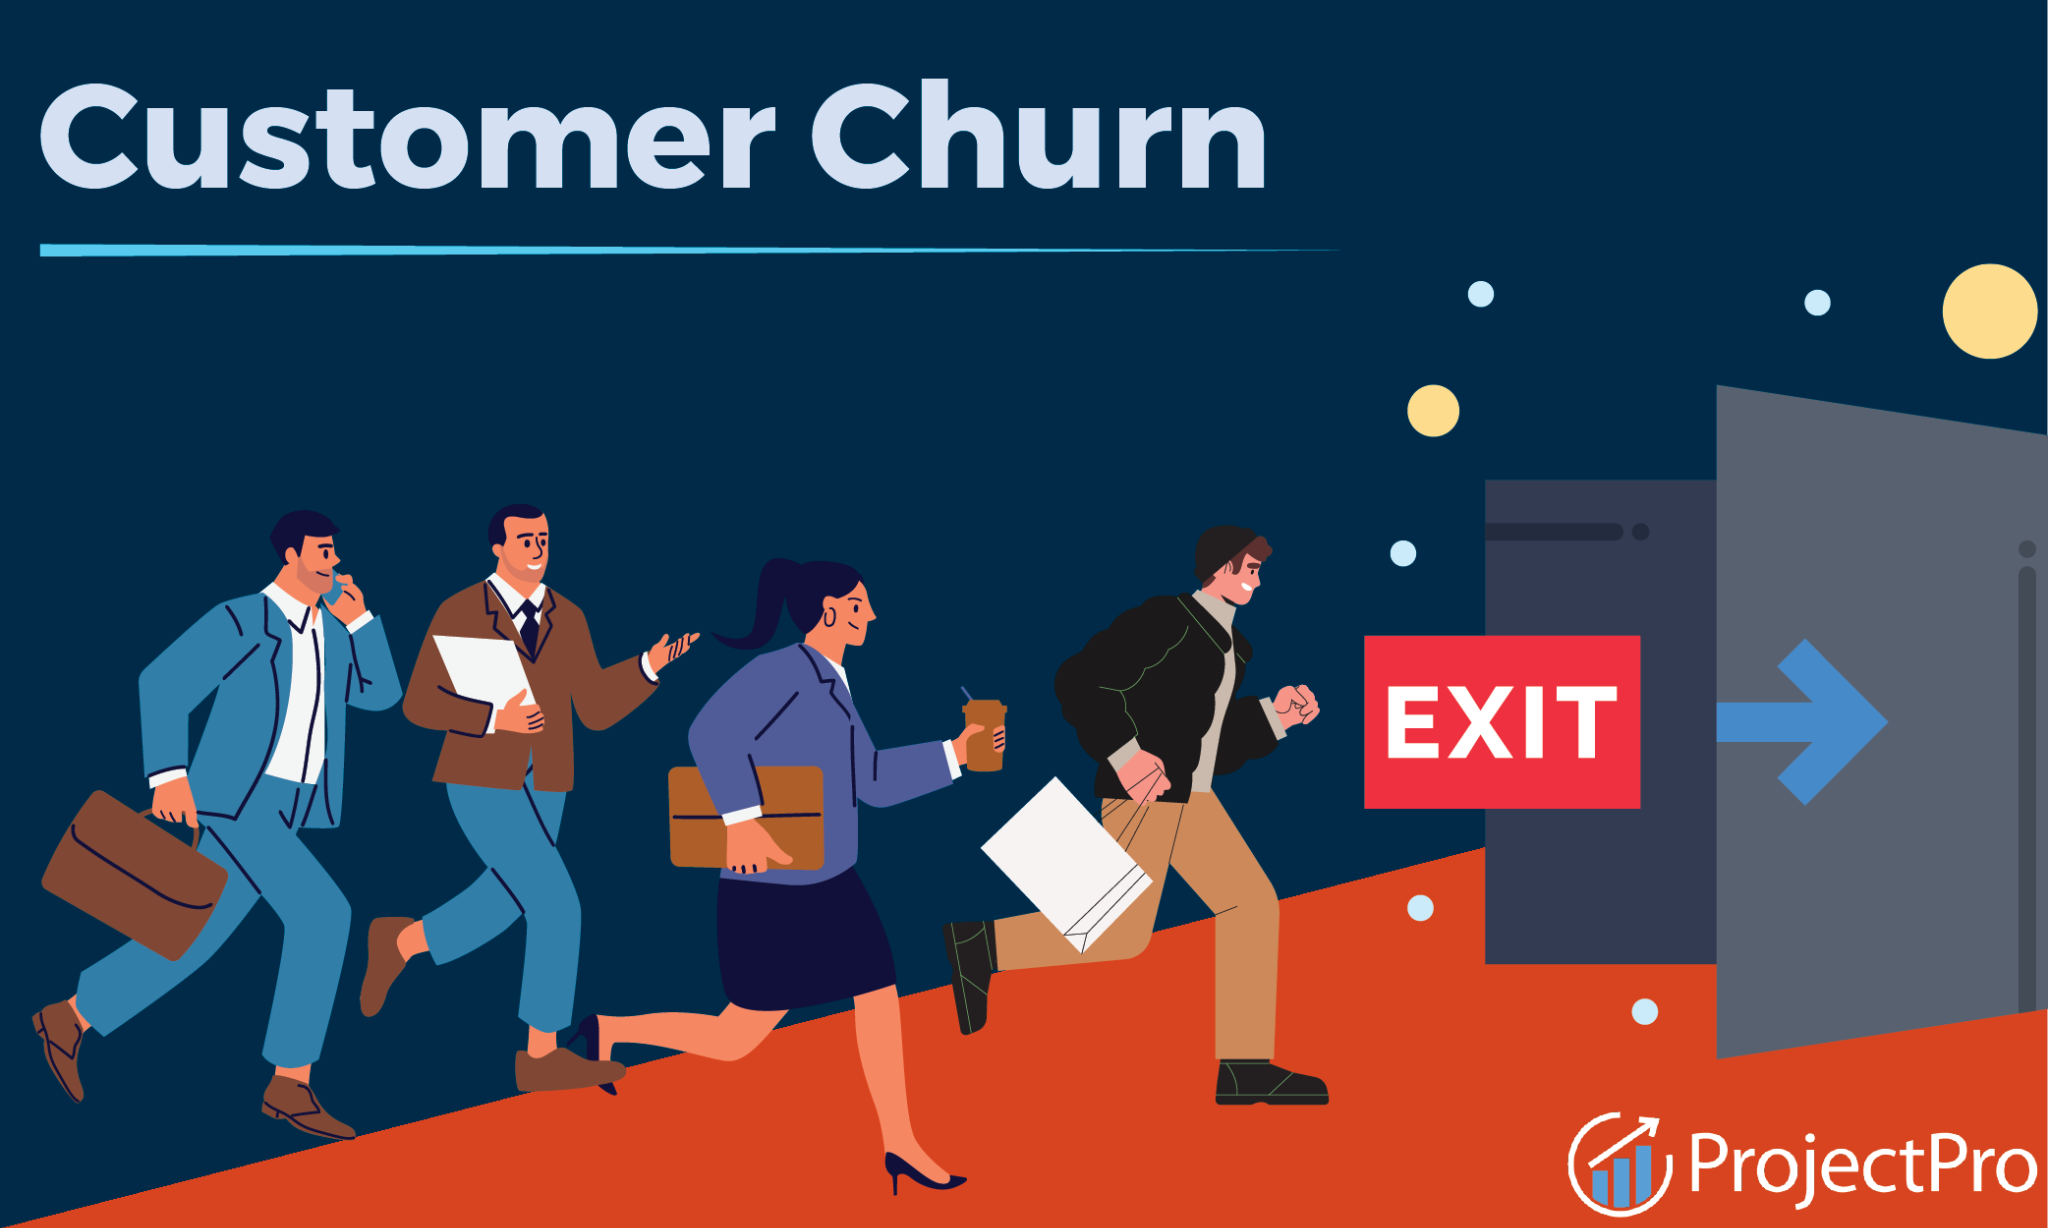

# 1. Load Python Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(color_codes=True)             # To get diffent different colors
pd.set_option('display.max_columns', None)  # To display the max columns

from tabulate import tabulate
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

# 2. Read the Dataset from csv file  - Using Pandas 

In [2]:
df = pd.read_csv('Telecom.csv')
df.head()

Customer ID  Gender  Age Married  Number of Dependents          City  \
0  0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1  0003-MKNFE    Male   46      No                     0      Glendale   
2  0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3  0011-IGKFF    Male   78     Yes                     0      Martinez   
4  0013-EXCHZ  Female   75     Yes                     0     Camarillo   

   Zip Code   Latitude   Longitude  Number of Referrals  Tenure in Months  \
0     93225  34.827662 -118.999073                    2                 9   
1     91206  34.162515 -118.203869                    0                 9   
2     92627  33.645672 -117.922613                    0                 4   
3     94553  38.014457 -122.115432                    1                13   
4     93010  34.227846 -119.079903                    3                 3   

     Offer Phone Service  Avg Monthly Long Distance Charges Multiple Lines  \
0      NaN           Yes                              42.39             No   
1      NaN           Yes                              10.69            Yes   
2  Offer E           Yes                              33.65             No   
3  Offer D           Yes                              27.82             No   
4      NaN           Yes                               7.38             No   

  Internet Service Internet Type  Avg Monthly GB Download Online Security  \
0              Yes         Cable                     16.0              No   
1              Yes         Cable                     10.0              No   
2              Yes   Fiber Optic                     30.0              No   
3              Yes   Fiber Optic                      4.0              No   
4              Yes   Fiber Optic                     11.0              No   

  Online Backup Device Protection Plan Premium Tech Support Streaming TV  \
0           Yes                     No                  Yes          Yes   
1            No                     No                   No           No   
2            No                    Yes                   No           No   
3           Yes                    Yes                   No          Yes   
4            No                     No                  Yes          Yes   

  Streaming Movies Streaming Music Unlimited Data        Contract  \
0               No              No            Yes        One Year   
1              Yes             Yes             No  Month-to-Month   
2               No              No            Yes  Month-to-Month   
3              Yes              No            Yes  Month-to-Month   
4               No              No            Yes  Month-to-Month   

  Paperless Billing   Payment Method  Monthly Charge  Total Charges  \
0               Yes      Credit Card            65.6         593.30   
1                No      Credit Card            -4.0         542.40   
2               Yes  Bank Withdrawal            73.9         280.85   
3               Yes  Bank Withdrawal            98.0        1237.85   
4               Yes      Credit Card            83.9         267.40   

   Total Refunds  Total Extra Data Charges  Total Long Distance Charges  \
0           0.00                         0                       381.51   
1          38.33                        10                        96.21   
2           0.00                         0                       134.60   
3           0.00                         0                       361.66   
4           0.00                         0                        22.14   

   Total Revenue Customer Status   Churn Category  \
0         974.81          Stayed              NaN   
1         610.28          Stayed              NaN   
2         415.45         Churned       Competitor   
3        1599.51         Churned  Dissatisfaction   
4         289.54         Churned  Dissatisfaction   

                    Churn Reason  
0                            NaN  
1                      

# 3. Basic Inspection on given dataset
- Head , tail , sample
- Shape , len , size
- dtypes , columns , info
- isnull().sum() , isna().sum()

In [3]:
def basic_inspection_dataset(table):
    """Generates a basic inspection dataset from the given table."""
    
    print("top 5 rows - using head")
    print(table.head())
    print()
        
    print("bottom 5 rows using tail")
    print(table.tail())
    print()
        
    print("numbers of samples and columns")
    print(table.shape)
    print()
    
    print("numbers of samples ")
    print(len(table))
    print()
    
    print("numbers of entries in the data frame")
    print(table.size)
    print()
    
    print("Columns Names")
    print(table.columns)
    print()

    print("Columns dtypes")
    print(table.dtypes)
    print()
    
    print("Dataframe info")
    print(table.info())
    print()
    
    print()
    print("check the missing value in each column")
    print(table.isnull().sum())
          
    print()
    print("check the missing value in each column")
    print(table.isna().sum())
    
    print()
    print("table summary ")
    print(table.describe())

basic_inspection_dataset(df)

top 5 rows - using head
  Customer ID  Gender  Age Married  Number of Dependents          City  \
0  0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1  0003-MKNFE    Male   46      No                     0      Glendale   
2  0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3  0011-IGKFF    Male   78     Yes                     0      Martinez   
4  0013-EXCHZ  Female   75     Yes                     0     Camarillo   

   Zip Code   Latitude   Longitude  Number of Referrals  Tenure in Months  \
0     93225  34.827662 -118.999073                    2                 9   
1     91206  34.162515 -118.203869                    0                 9   
2     92627  33.645672 -117.922613                    0                 4   
3     94553  38.014457 -122.115432                    1                13   
4     93010  34.227846 -119.079903                    3                 3   

     Offer Phone Service  Avg Monthly Long Distance Charges Multiple

### 3.1 Non-Significant columns - we need to drop here.
 - we can not find any insights from them

In [4]:
# Drop identifier column
df.drop(columns = ['Customer ID', 'Zip Code'], inplace=True)
df.shape

(7043, 36)

In [5]:
#Check the number of unique value from all of the object datatype
df.select_dtypes(include='object').nunique()

Gender                       2
Married                      2
City                      1106
Offer                        5
Phone Service                2
Multiple Lines               2
Internet Service             2
Internet Type                3
Online Security              2
Online Backup                2
Device Protection Plan       2
Premium Tech Support         2
Streaming TV                 2
Streaming Movies             2
Streaming Music              2
Unlimited Data               2
Contract                     3
Paperless Billing            2
Payment Method               3
Customer Status              3
Churn Category               5
Churn Reason                20
dtype: int64

In [6]:
# Drop city column because it have alot of unique value
df.drop(columns = 'City', inplace=True)
df.shape

(7043, 35)

# 4. Handling Missing Values - Cat - Variables

In [7]:
missing_vals_cat_columns=[]
cat_columns = df.select_dtypes(include='object').columns
for cat_var in cat_columns:
    print(f"{cat_var} missing values:",df[cat_var].isna().sum())
    if df[cat_var].isna().sum() !=0:
        missing_vals_cat_columns.append(cat_var)

print("mising value - columns")
print(missing_vals_cat_columns)

Gender missing values: 0
Married missing values: 0
Offer missing values: 3877
Phone Service missing values: 0
Multiple Lines missing values: 682
Internet Service missing values: 0
Internet Type missing values: 1526
Online Security missing values: 1526
Online Backup missing values: 1526
Device Protection Plan missing values: 1526
Premium Tech Support missing values: 1526
Streaming TV missing values: 1526
Streaming Movies missing values: 1526
Streaming Music missing values: 1526
Unlimited Data missing values: 1526
Contract missing values: 0
Paperless Billing missing values: 0
Payment Method missing values: 0
Customer Status missing values: 0
Churn Category missing values: 5174
Churn Reason missing values: 5174
mising value - columns
['Offer', 'Multiple Lines', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Churn Category', 'Churn Reason']


In [8]:
# Check the amounnt of missing value
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Churn Category                       73.463013
Churn Reason                         73.463013
Offer                                55.047565
Internet Type                        21.666903
Avg Monthly GB Download              21.666903
Online Security                      21.666903
Online Backup                        21.666903
Device Protection Plan               21.666903
Premium Tech Support                 21.666903
Streaming TV                         21.666903
Streaming Movies                     21.666903
Streaming Music                      21.666903
Unlimited Data                       21.666903
Avg Monthly Long Distance Charges     9.683374
Multiple Lines                        9.683374
dtype: float64

In [9]:
# Drop column with missing value more than 25%
df.drop(columns = ['Churn Category', 'Churn Reason','Offer'], inplace=True)
df.shape

(7043, 32)

In [10]:
# Check the amounnt of missing value
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Internet Type                        21.666903
Avg Monthly GB Download              21.666903
Online Security                      21.666903
Online Backup                        21.666903
Device Protection Plan               21.666903
Premium Tech Support                 21.666903
Streaming TV                         21.666903
Streaming Movies                     21.666903
Streaming Music                      21.666903
Unlimited Data                       21.666903
Avg Monthly Long Distance Charges     9.683374
Multiple Lines                        9.683374
dtype: float64

In [11]:
# Drop column with 21% missing value because they are in the same user that have missing value
subset_columns = ['Internet Type', 'Avg Monthly GB Download',
                  'Online Security', 'Online Backup',
                  'Device Protection Plan', 'Premium Tech Support',
                  'Streaming TV', 'Streaming Movies',
                  'Streaming Music', 'Unlimited Data']
df.dropna(subset=subset_columns, inplace=True)

In [12]:
# Check the amounnt of missing value
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Avg Monthly Long Distance Charges    12.361791
Multiple Lines                       12.361791
dtype: float64

In [13]:
# Drop column with 9% missing value because they are in the same user that have missing value
subset_columns = ['Avg Monthly Long Distance Charges',
                  'Multiple Lines']
df.dropna(subset=subset_columns, inplace=True)

In [14]:
# Check the amounnt of missing value
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

In [15]:
# Multi classification or Bi classifiacion
df['Customer Status'].value_counts()

Customer Status
Stayed     3015
Churned    1586
Joined      234
Name: count, dtype: int64

In [16]:
# Change Joined into stayed, so we can make binary classification
# Replace all values in the 'Customer Status' column with 'Stayed'
df['Customer Status'] = df['Customer Status'].replace('Joined', 'Stayed')
df['Customer Status'].value_counts()

Customer Status
Stayed     3249
Churned    1586
Name: count, dtype: int64

# 5. Categorical- UniVariable - Analysis -Using Pipeline
   - Frequency Table 
   - Bar Graph
   - Pie Graph

In [17]:
class BarPieChartTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df=X.copy()
        cat_cols = df.select_dtypes(include='object').columns
        for cat_name in cat_cols:
            value_counts = df[cat_name].value_counts().reset_index()
            # Rename the columns
            value_counts.columns = ['Class', 'Frequency']

            # Print the result as a table
            print(f"{cat_name} frequency table")
            print(tabulate(value_counts, headers='keys', tablefmt='pretty'))

            # Calculate relative frequency
            total_count = value_counts['Frequency'].sum()
            value_counts['Relative Frequency %'] = round((value_counts['Frequency'] / total_count)*100,2)

            # Print the result as a table
            print(f"{cat_name} Relative frequency table")
            print(tabulate(value_counts, headers='keys', tablefmt='pretty'))

            # Extract the values and index from value counts
            value_counts = df[cat_name].value_counts()
            values = value_counts.values
            labels = value_counts.index

            fig, axs = plt.subplots(1, 2, figsize=(18, 6))  # 1 row, 2 columns
            # Create a bar graph
            axs[0].bar(labels, values)
            axs[0].set_title(f'Frequency of {cat_name}')
            axs[0].set_xlabel('Categories')  # Set x-label
            axs[0].set_ylabel('Count')       # Set y-label

            axs[1].pie(value_counts.values, labels=value_counts.index, autopct='%0.2f%%', startangle=40)
            axs[1].set_title(f'Relative Frequency of {cat_name}')
            plt.tight_layout()
            # Show the plot
            plt.show()  
        
        

Gender frequency table
+---+--------+-----------+
|   | Class  | Frequency |
+---+--------+-----------+
| 0 |  Male  |   2425    |
| 1 | Female |   2410    |
+---+--------+-----------+
Gender Relative frequency table
+---+--------+-----------+----------------------+
|   | Class  | Frequency | Relative Frequency % |
+---+--------+-----------+----------------------+
| 0 |  Male  |   2425    |        50.16         |
| 1 | Female |   2410    |        49.84         |
+---+--------+-----------+----------------------+


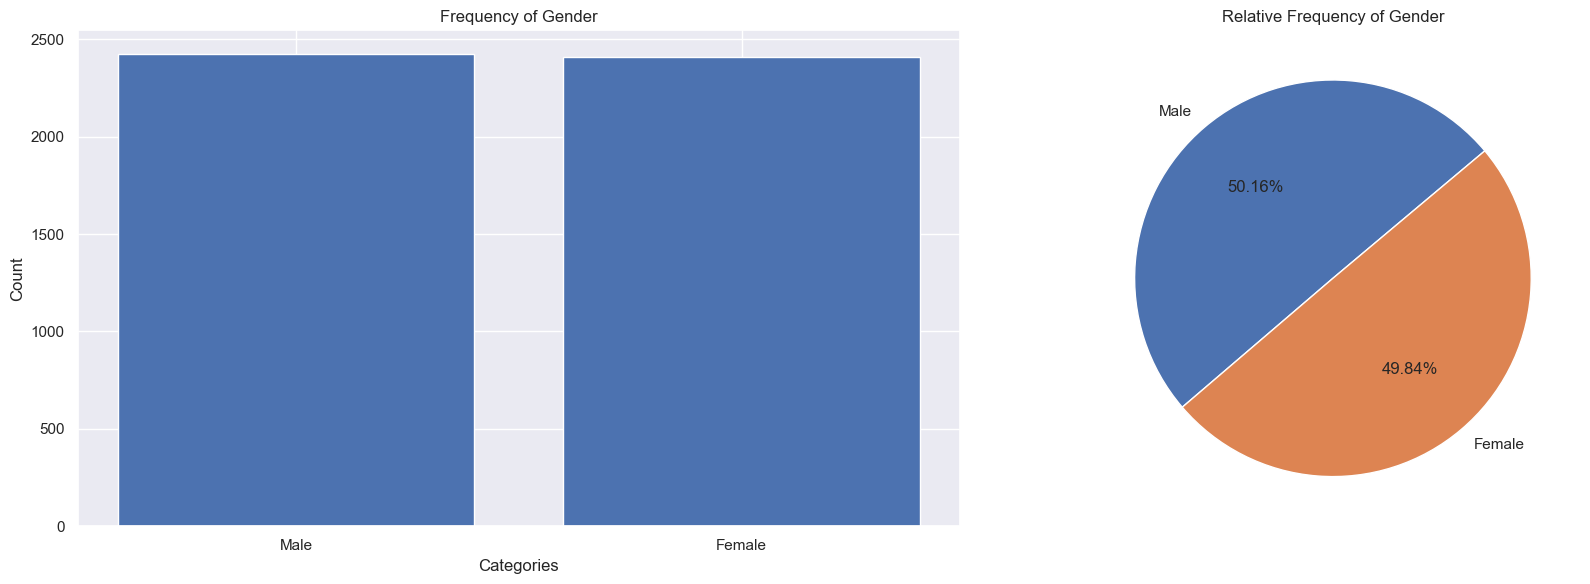

Married frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |  No   |   2482    |
| 1 |  Yes  |   2353    |
+---+-------+-----------+
Married Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |  No   |   2482    |        51.33         |
| 1 |  Yes  |   2353    |        48.67         |
+---+-------+-----------+----------------------+


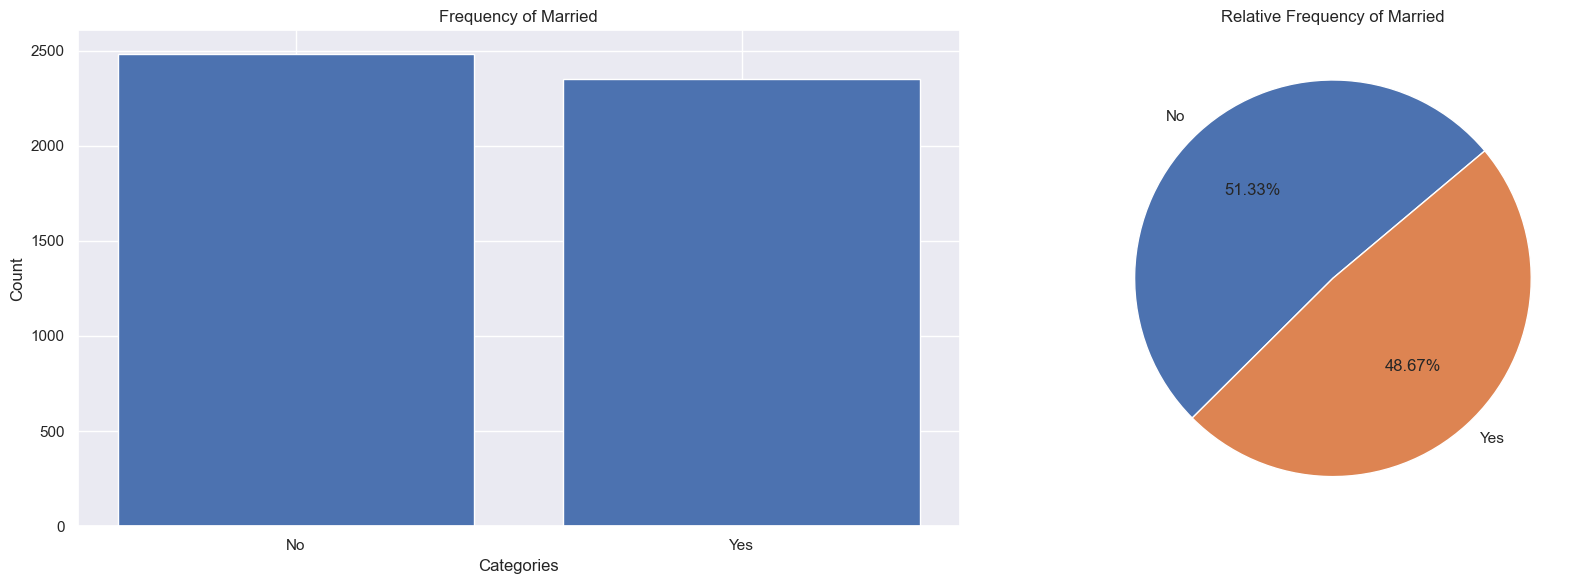

Phone Service frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |  Yes  |   4835    |
+---+-------+-----------+
Phone Service Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |  Yes  |   4835    |        100.0         |
+---+-------+-----------+----------------------+


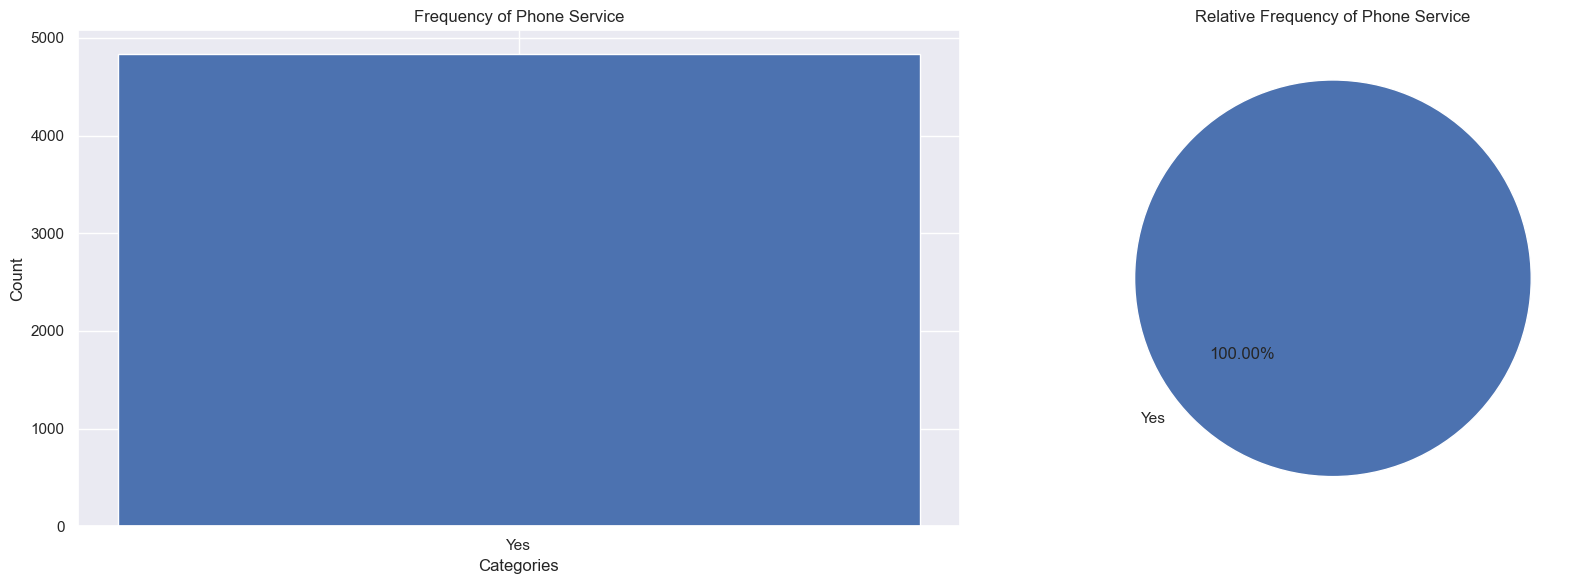

Multiple Lines frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |  Yes  |   2629    |
| 1 |  No   |   2206    |
+---+-------+-----------+
Multiple Lines Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |  Yes  |   2629    |        54.37         |
| 1 |  No   |   2206    |        45.63         |
+---+-------+-----------+----------------------+


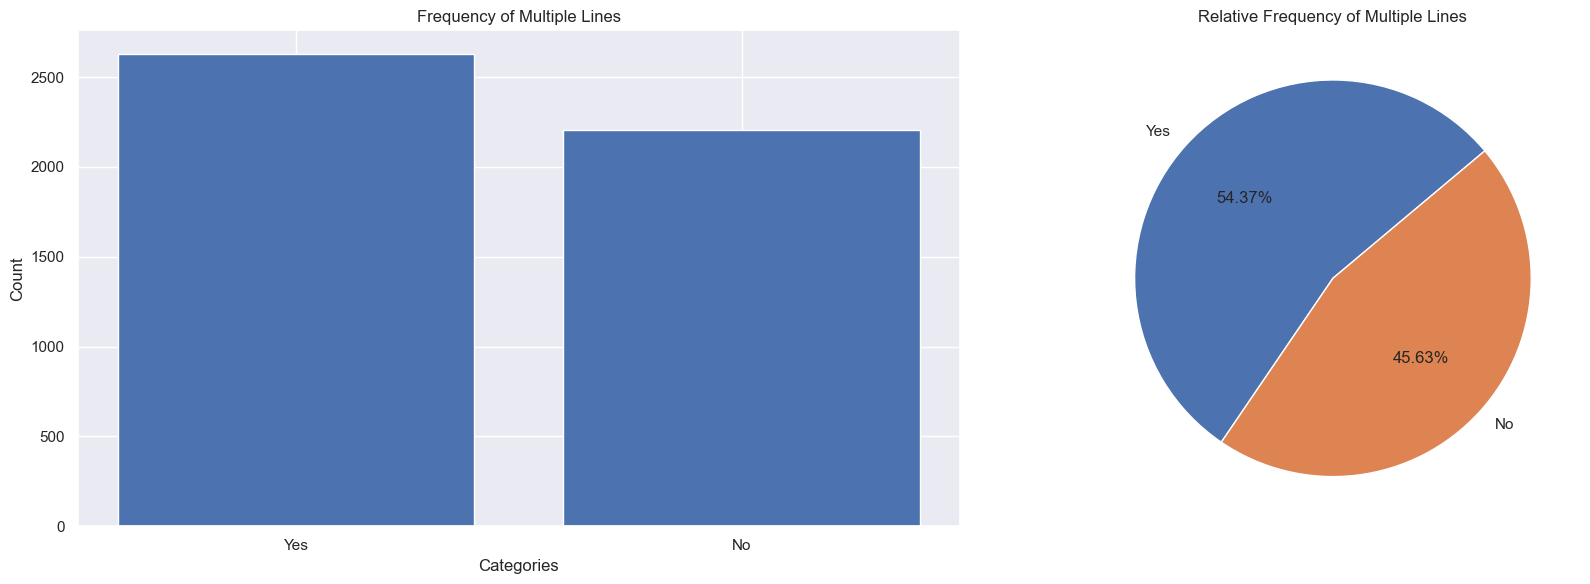

Internet Service frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |  Yes  |   4835    |
+---+-------+-----------+
Internet Service Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |  Yes  |   4835    |        100.0         |
+---+-------+-----------+----------------------+


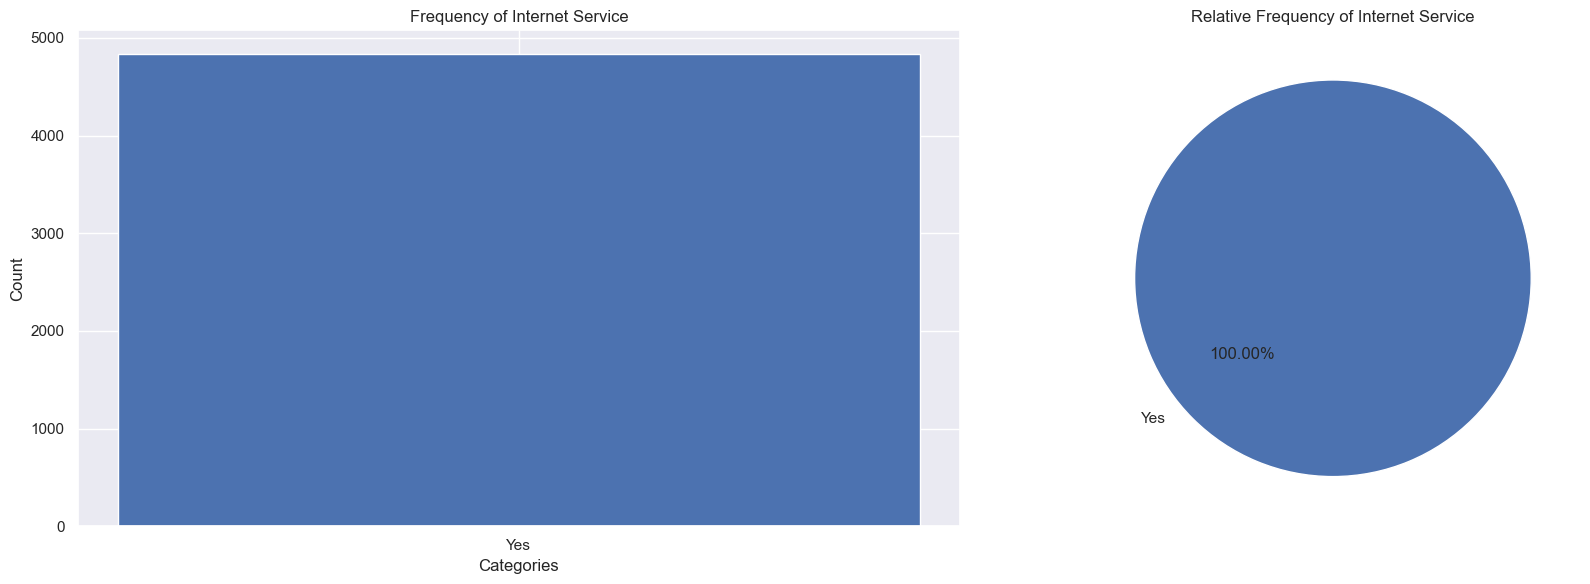

Internet Type frequency table
+---+-------------+-----------+
|   |    Class    | Frequency |
+---+-------------+-----------+
| 0 | Fiber Optic |   3035    |
| 1 |     DSL     |   1199    |
| 2 |    Cable    |    601    |
+---+-------------+-----------+
Internet Type Relative frequency table
+---+-------------+-----------+----------------------+
|   |    Class    | Frequency | Relative Frequency % |
+---+-------------+-----------+----------------------+
| 0 | Fiber Optic |   3035    |        62.77         |
| 1 |     DSL     |   1199    |         24.8         |
| 2 |    Cable    |    601    |        12.43         |
+---+-------------+-----------+----------------------+


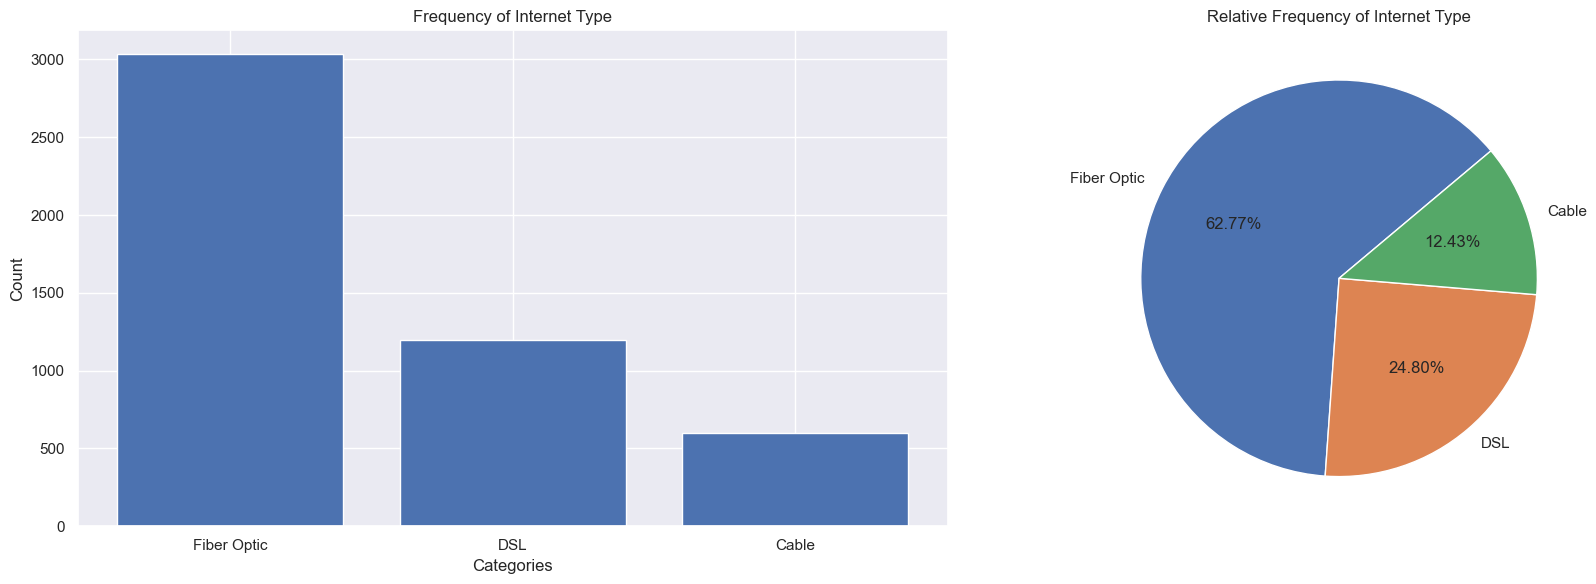

Online Security frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |  No   |   3099    |
| 1 |  Yes  |   1736    |
+---+-------+-----------+
Online Security Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |  No   |   3099    |         64.1         |
| 1 |  Yes  |   1736    |         35.9         |
+---+-------+-----------+----------------------+


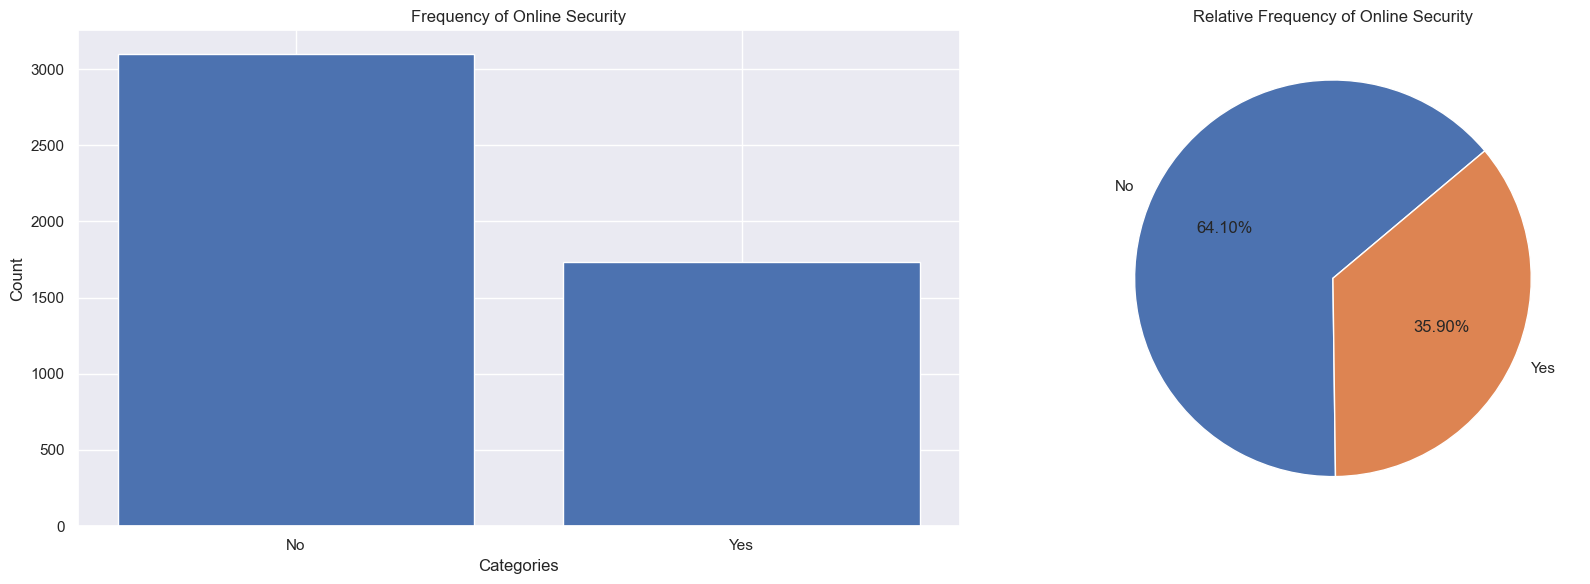

Online Backup frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |  No   |   2693    |
| 1 |  Yes  |   2142    |
+---+-------+-----------+
Online Backup Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |  No   |   2693    |         55.7         |
| 1 |  Yes  |   2142    |         44.3         |
+---+-------+-----------+----------------------+


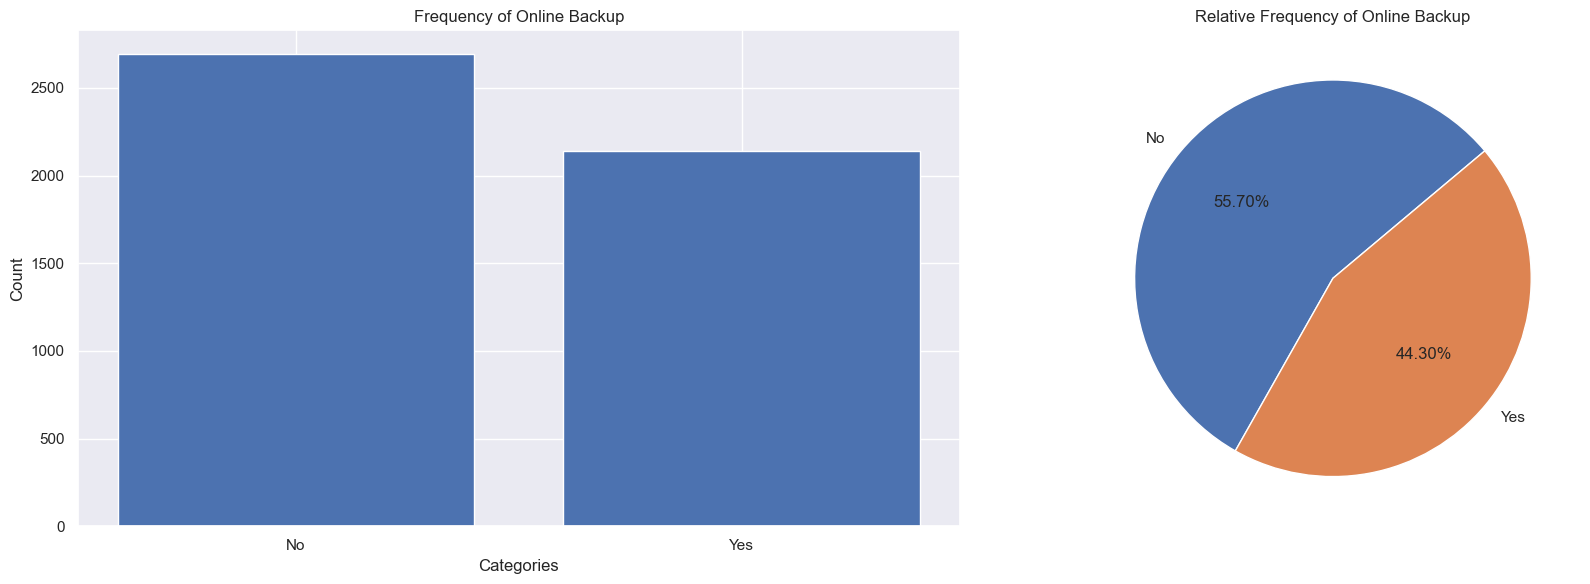

Device Protection Plan frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |  No   |   2718    |
| 1 |  Yes  |   2117    |
+---+-------+-----------+
Device Protection Plan Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |  No   |   2718    |        56.22         |
| 1 |  Yes  |   2117    |        43.78         |
+---+-------+-----------+----------------------+


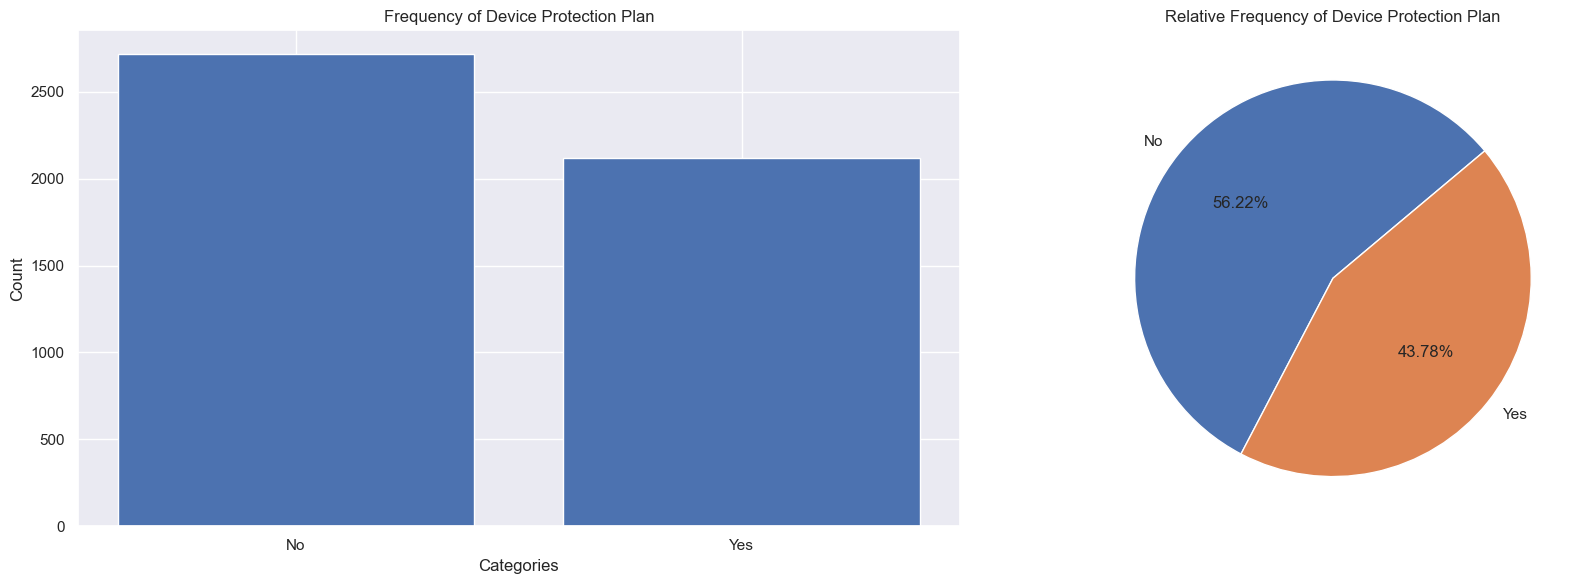

Premium Tech Support frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |  No   |   3080    |
| 1 |  Yes  |   1755    |
+---+-------+-----------+
Premium Tech Support Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |  No   |   3080    |         63.7         |
| 1 |  Yes  |   1755    |         36.3         |
+---+-------+-----------+----------------------+


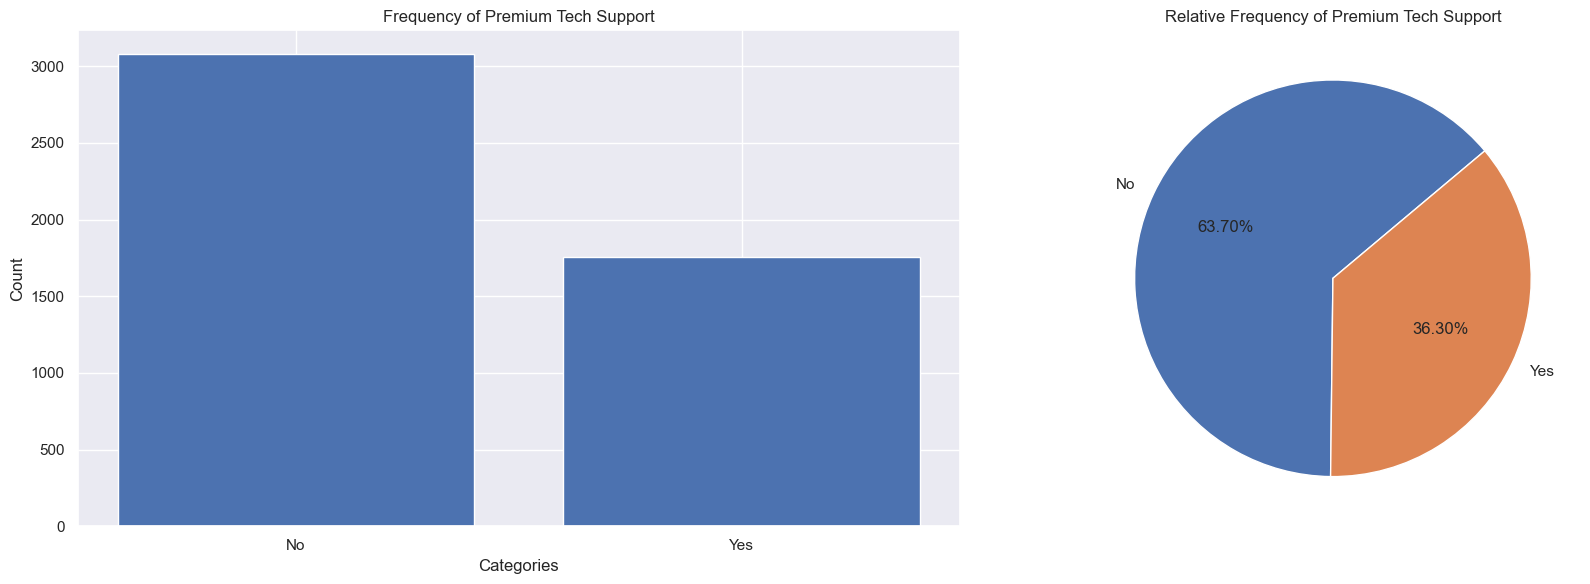

Streaming TV frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |  Yes  |   2422    |
| 1 |  No   |   2413    |
+---+-------+-----------+
Streaming TV Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |  Yes  |   2422    |        50.09         |
| 1 |  No   |   2413    |        49.91         |
+---+-------+-----------+----------------------+


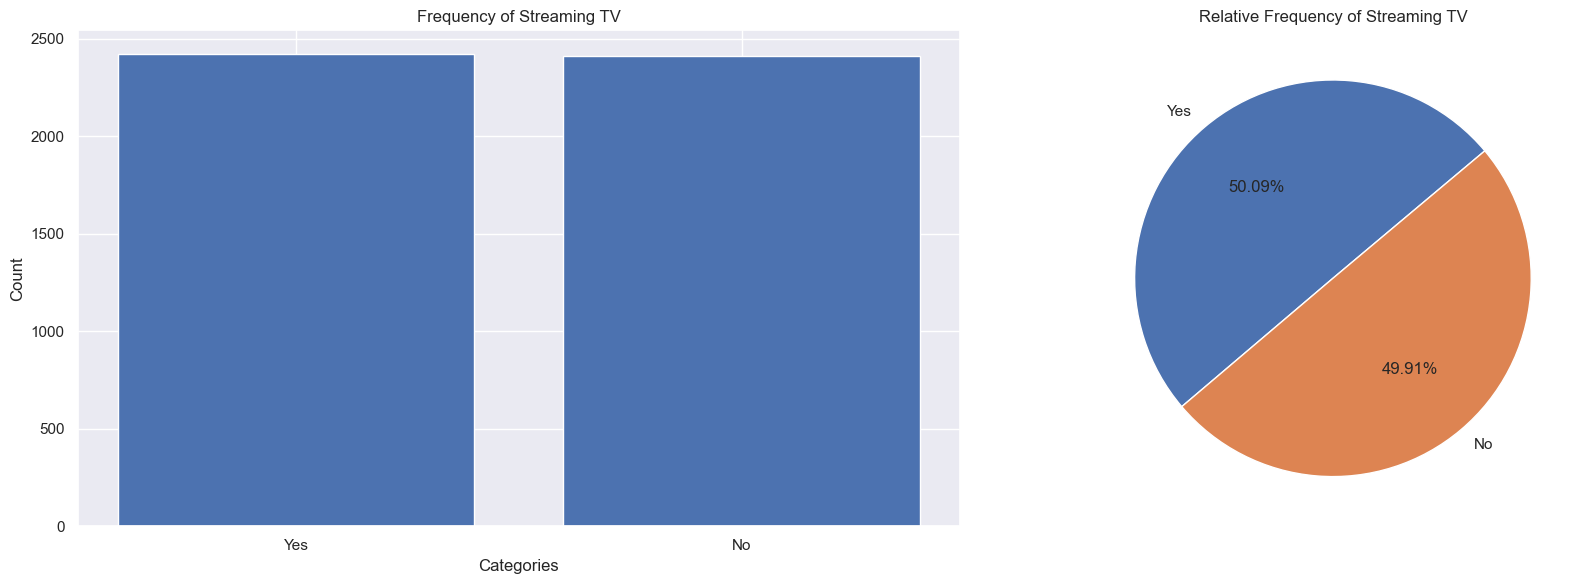

Streaming Movies frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |  Yes  |   2434    |
| 1 |  No   |   2401    |
+---+-------+-----------+
Streaming Movies Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |  Yes  |   2434    |        50.34         |
| 1 |  No   |   2401    |        49.66         |
+---+-------+-----------+----------------------+


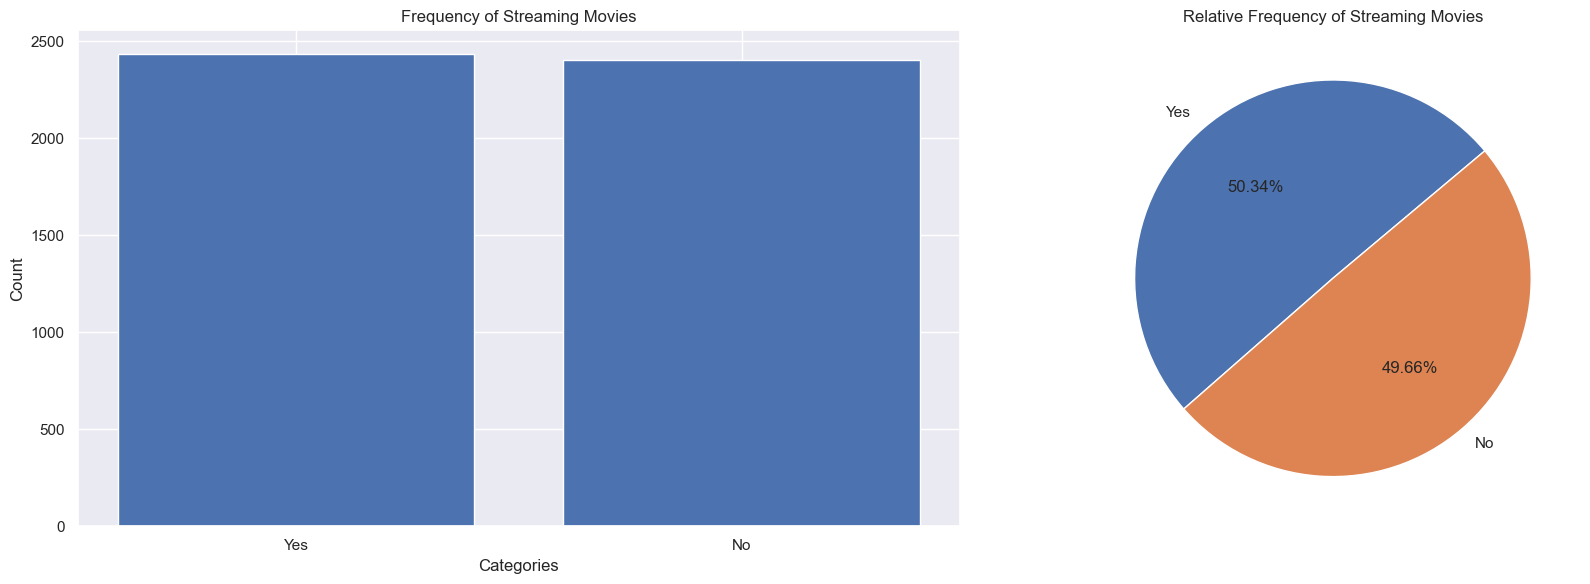

Streaming Music frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |  No   |   2627    |
| 1 |  Yes  |   2208    |
+---+-------+-----------+
Streaming Music Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |  No   |   2627    |        54.33         |
| 1 |  Yes  |   2208    |        45.67         |
+---+-------+-----------+----------------------+


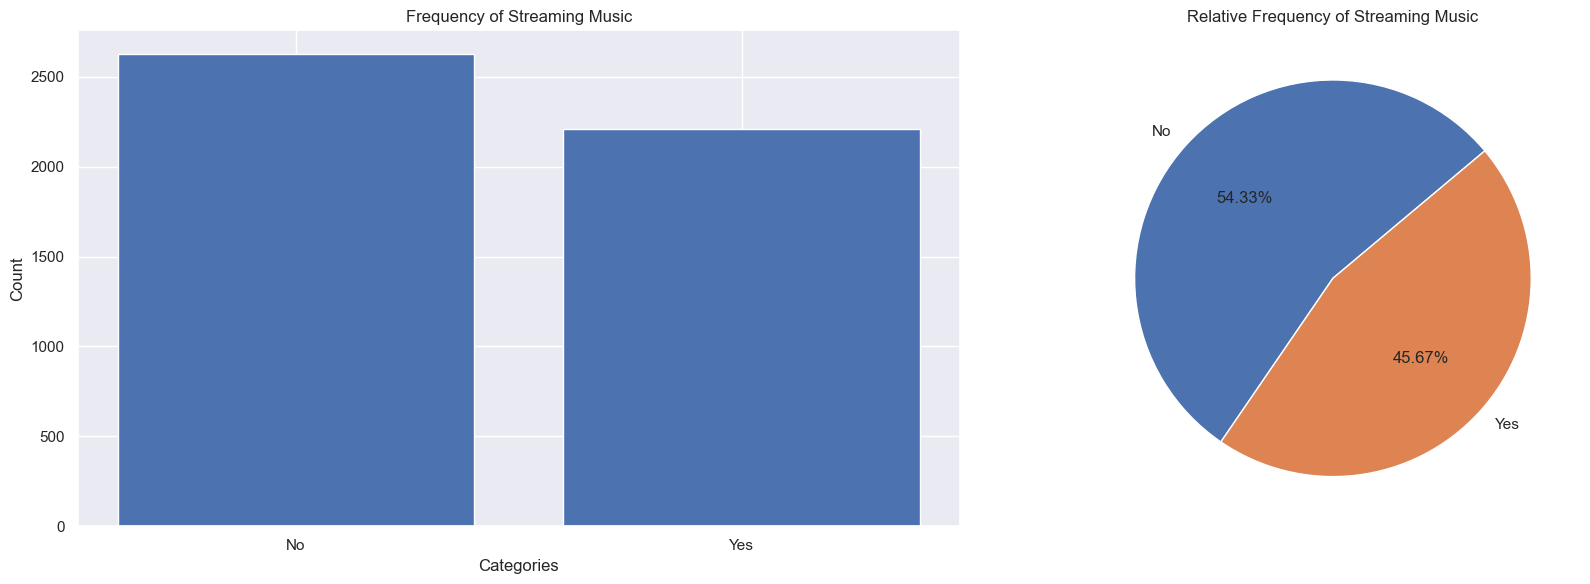

Unlimited Data frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |  Yes  |   4166    |
| 1 |  No   |    669    |
+---+-------+-----------+
Unlimited Data Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |  Yes  |   4166    |        86.16         |
| 1 |  No   |    669    |        13.84         |
+---+-------+-----------+----------------------+


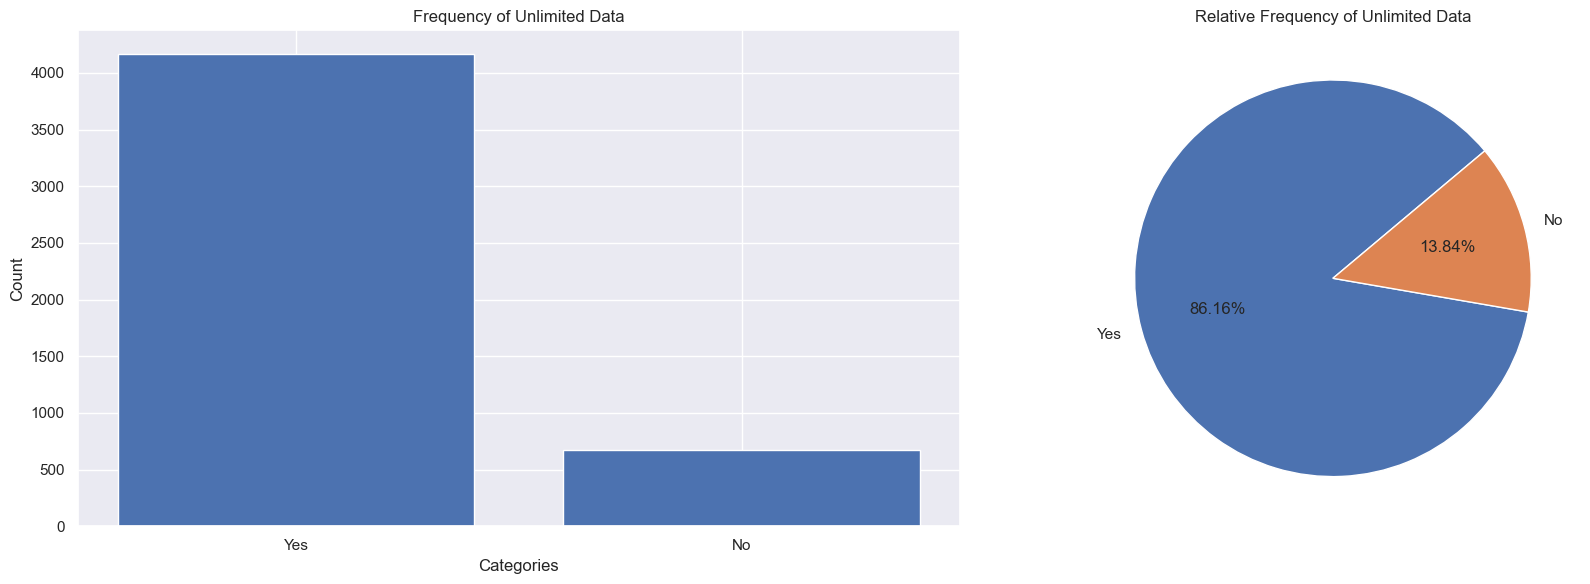

Contract frequency table
+---+----------------+-----------+
|   |     Class      | Frequency |
+---+----------------+-----------+
| 0 | Month-to-Month |   2740    |
| 1 |    Two Year    |   1061    |
| 2 |    One Year    |   1034    |
+---+----------------+-----------+
Contract Relative frequency table
+---+----------------+-----------+----------------------+
|   |     Class      | Frequency | Relative Frequency % |
+---+----------------+-----------+----------------------+
| 0 | Month-to-Month |   2740    |        56.67         |
| 1 |    Two Year    |   1061    |        21.94         |
| 2 |    One Year    |   1034    |        21.39         |
+---+----------------+-----------+----------------------+


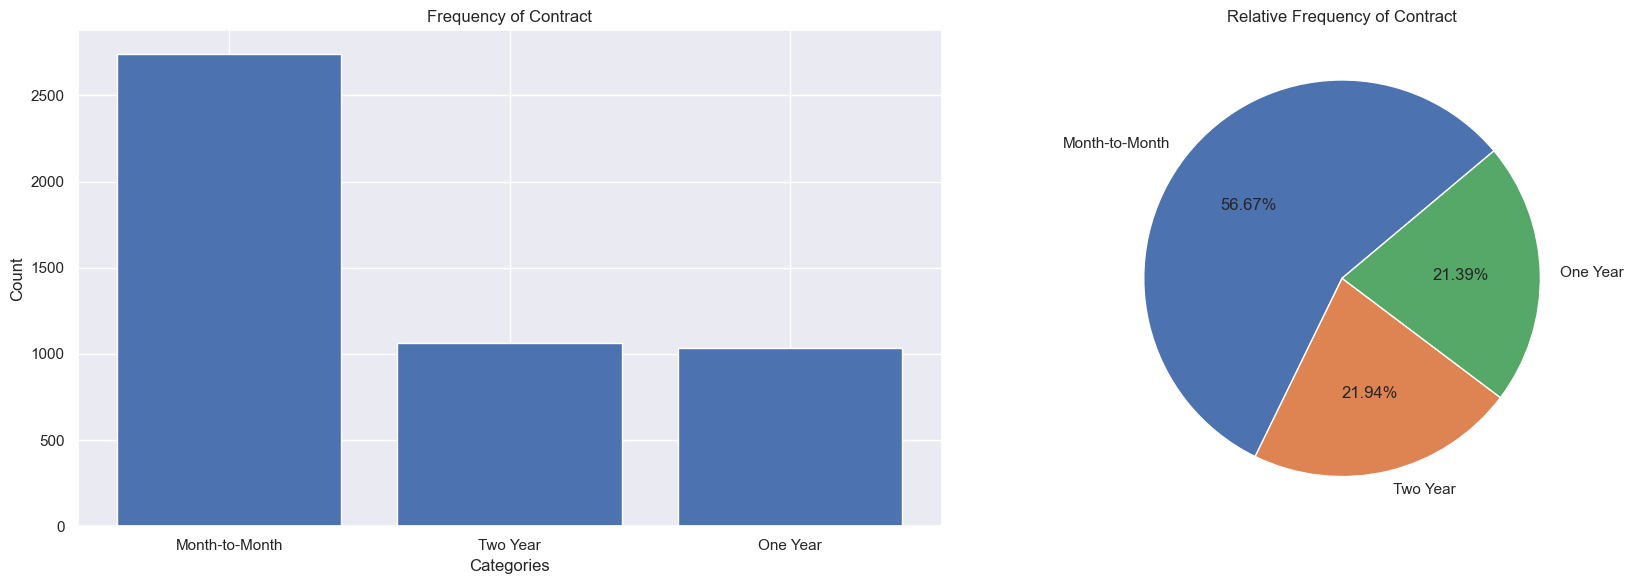

Paperless Billing frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |  Yes  |   3338    |
| 1 |  No   |   1497    |
+---+-------+-----------+
Paperless Billing Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |  Yes  |   3338    |        69.04         |
| 1 |  No   |   1497    |        30.96         |
+---+-------+-----------+----------------------+


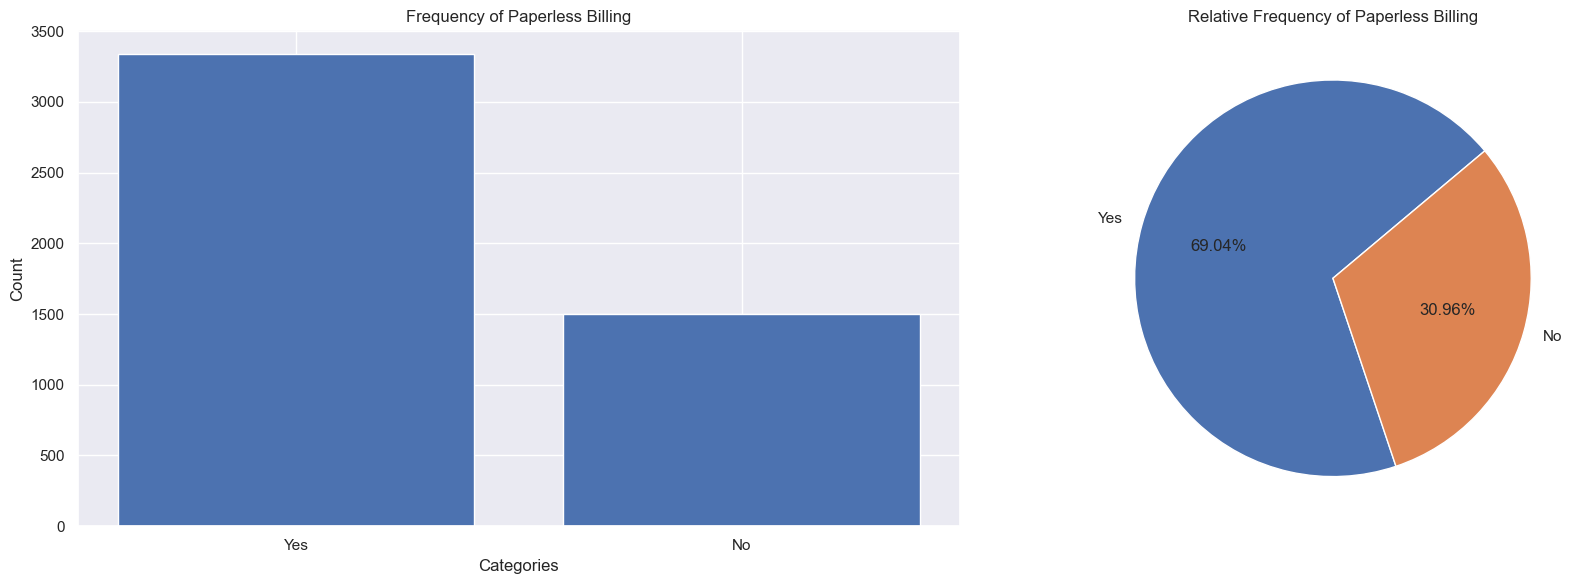

Payment Method frequency table
+---+-----------------+-----------+
|   |      Class      | Frequency |
+---+-----------------+-----------+
| 0 | Bank Withdrawal |   3086    |
| 1 |   Credit Card   |   1558    |
| 2 |  Mailed Check   |    191    |
+---+-----------------+-----------+
Payment Method Relative frequency table
+---+-----------------+-----------+----------------------+
|   |      Class      | Frequency | Relative Frequency % |
+---+-----------------+-----------+----------------------+
| 0 | Bank Withdrawal |   3086    |        63.83         |
| 1 |   Credit Card   |   1558    |        32.22         |
| 2 |  Mailed Check   |    191    |         3.95         |
+---+-----------------+-----------+----------------------+


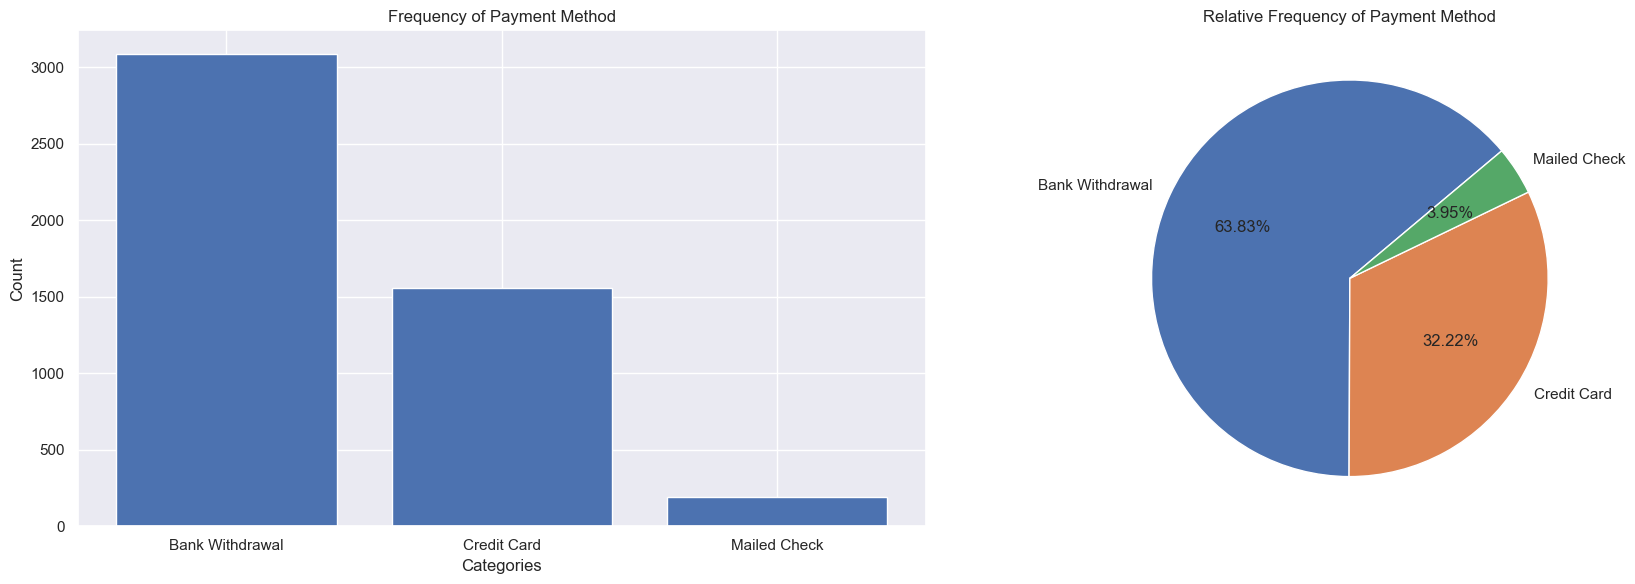

Customer Status frequency table
+---+---------+-----------+
|   |  Class  | Frequency |
+---+---------+-----------+
| 0 | Stayed  |   3249    |
| 1 | Churned |   1586    |
+---+---------+-----------+
Customer Status Relative frequency table
+---+---------+-----------+----------------------+
|   |  Class  | Frequency | Relative Frequency % |
+---+---------+-----------+----------------------+
| 0 | Stayed  |   3249    |         67.2         |
| 1 | Churned |   1586    |         32.8         |
+---+---------+-----------+----------------------+


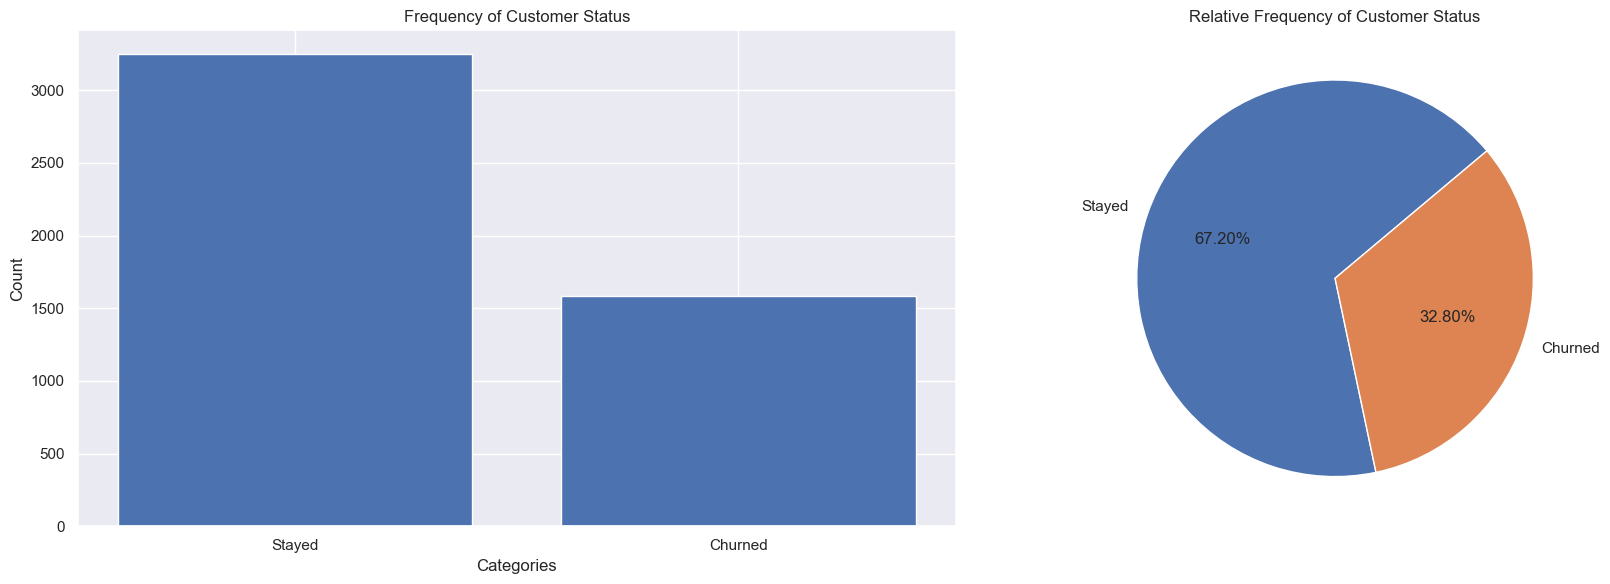

In [18]:
pipeline_cat_var = Pipeline([
    ('bar_pie_chart', BarPieChartTransformer())
])


# Fit and transform your data using the pipeline
processed_data = pipeline_cat_var.fit_transform(df)

# 7. Numerical - UniVariable - Analysis - Using -Pipeline

In [19]:
class HistBoxChartTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df=X.copy()
        num_cols = df.select_dtypes(exclude='object').columns
        for con_var in num_cols:
               
            
            # Create a figure and axes object
            fig, axes = plt.subplots(1, 3, figsize=(14, 6))

            # Plot histogram without KDE on the left
            axes[0].hist(df[con_var], color='skyblue', edgecolor='black')
            axes[0].set_xlabel('Value')
            axes[0].set_ylabel('Frequency')
            axes[0].set_title(f'Histogram {con_var}')

            # Plot histogram with KDE on the right
            sns.histplot(data=df, x=con_var, kde=True, color='orange', edgecolor='black', ax=axes[1])
            axes[1].set_xlabel('Value')
            axes[1].set_ylabel('Density')
            axes[1].set_title('Histogram with KDE')
            
           
             # box Plot 
            sns.boxplot(data=df, x=con_var, ax=axes[2])
            axes[2].set_title(con_var)

            # Adjust layout
            plt.tight_layout()

            # Show the combined plot
            plt.show()
        


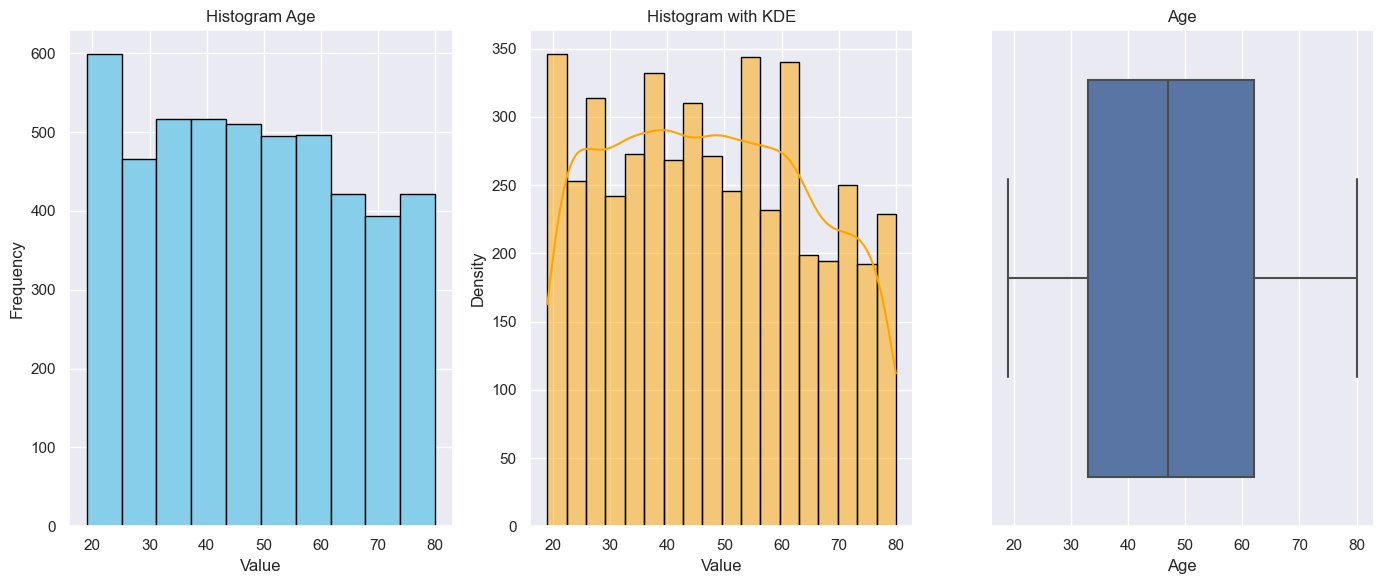

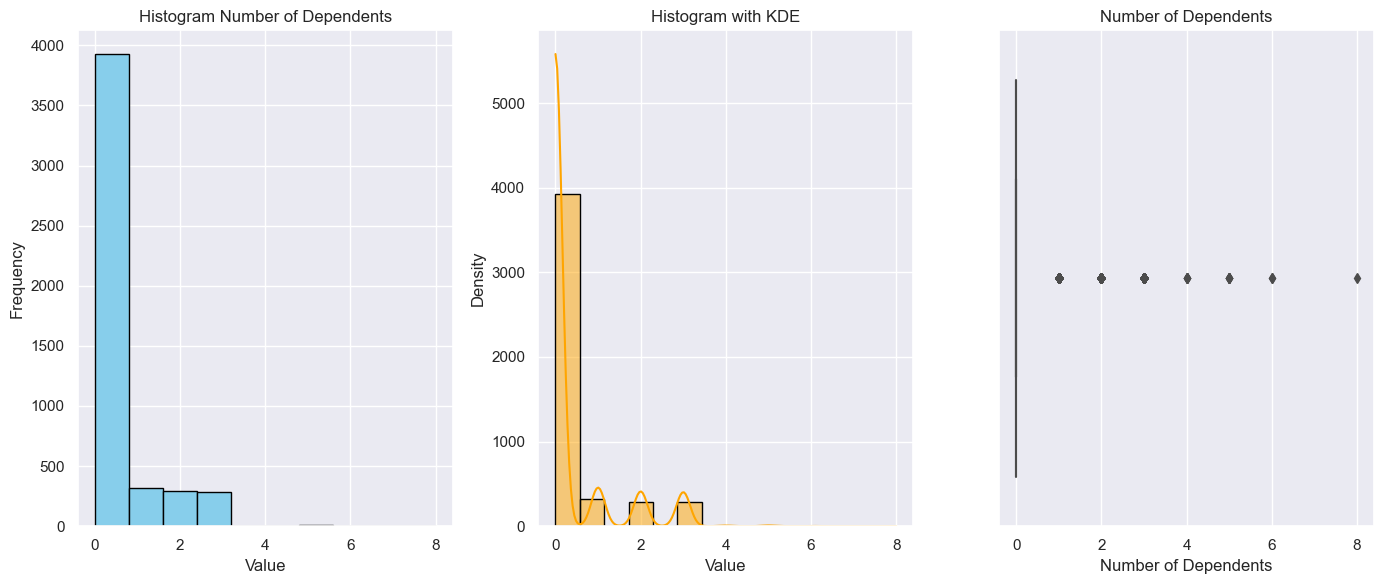

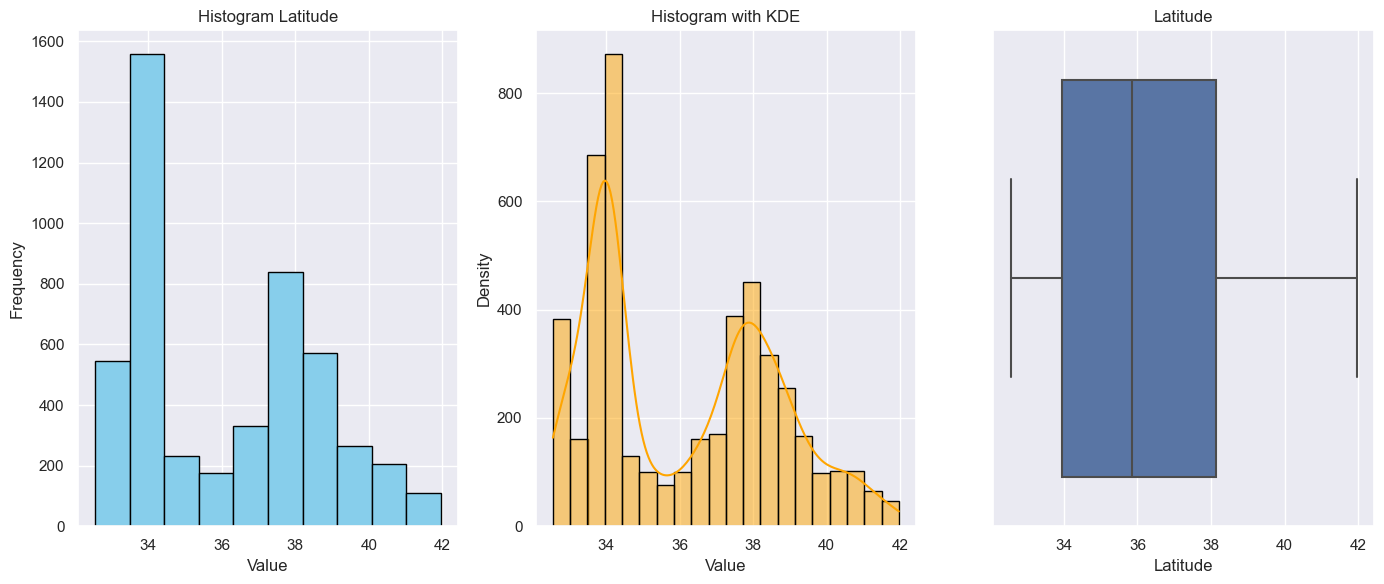

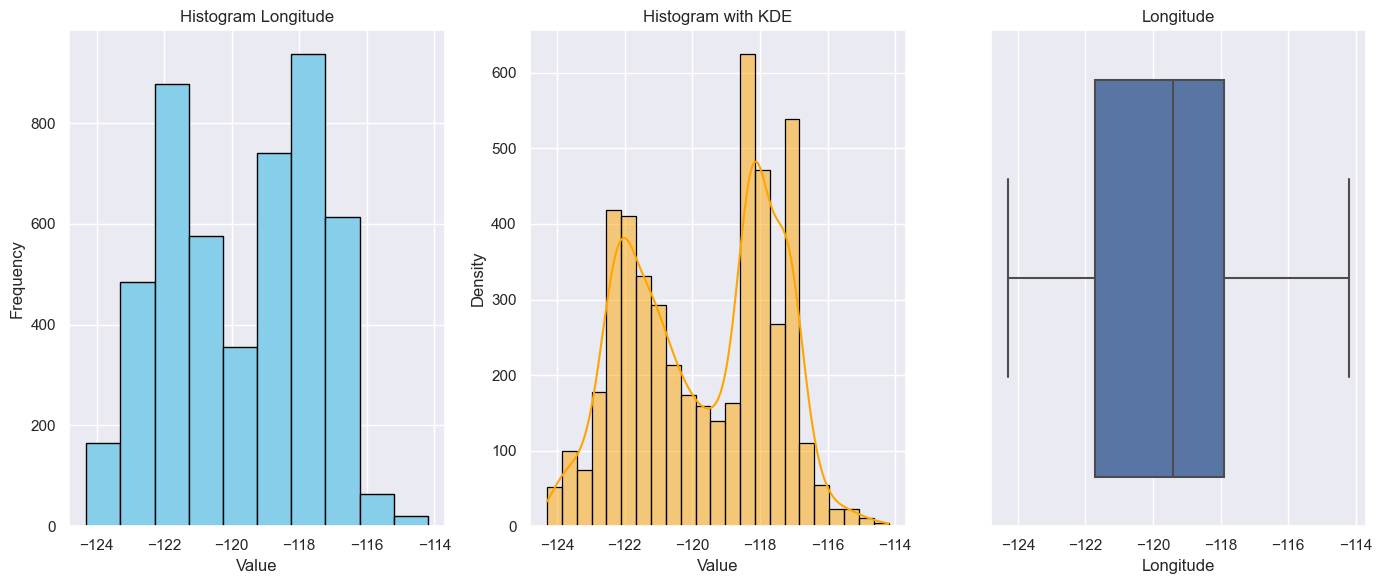

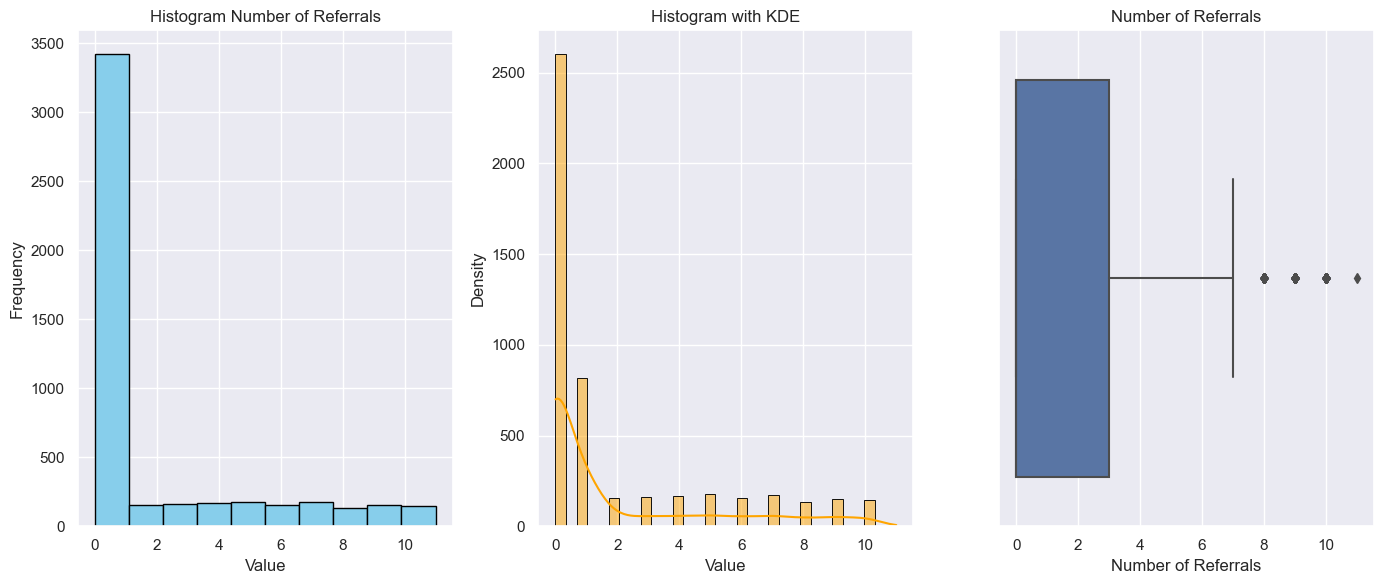

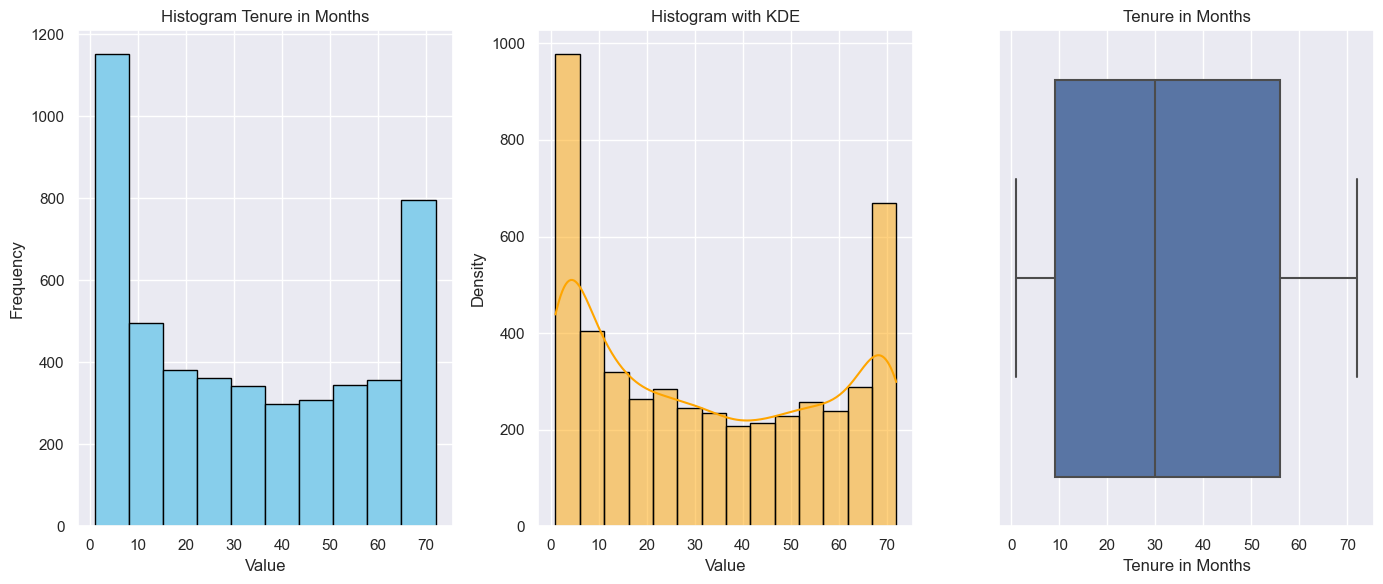

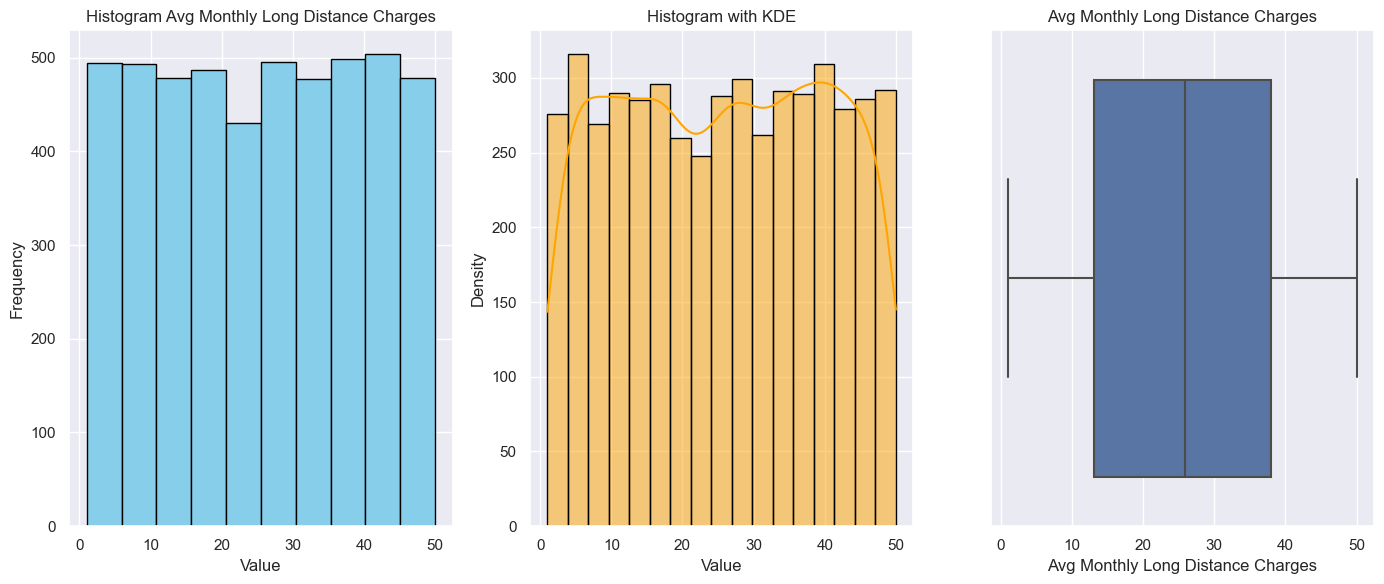

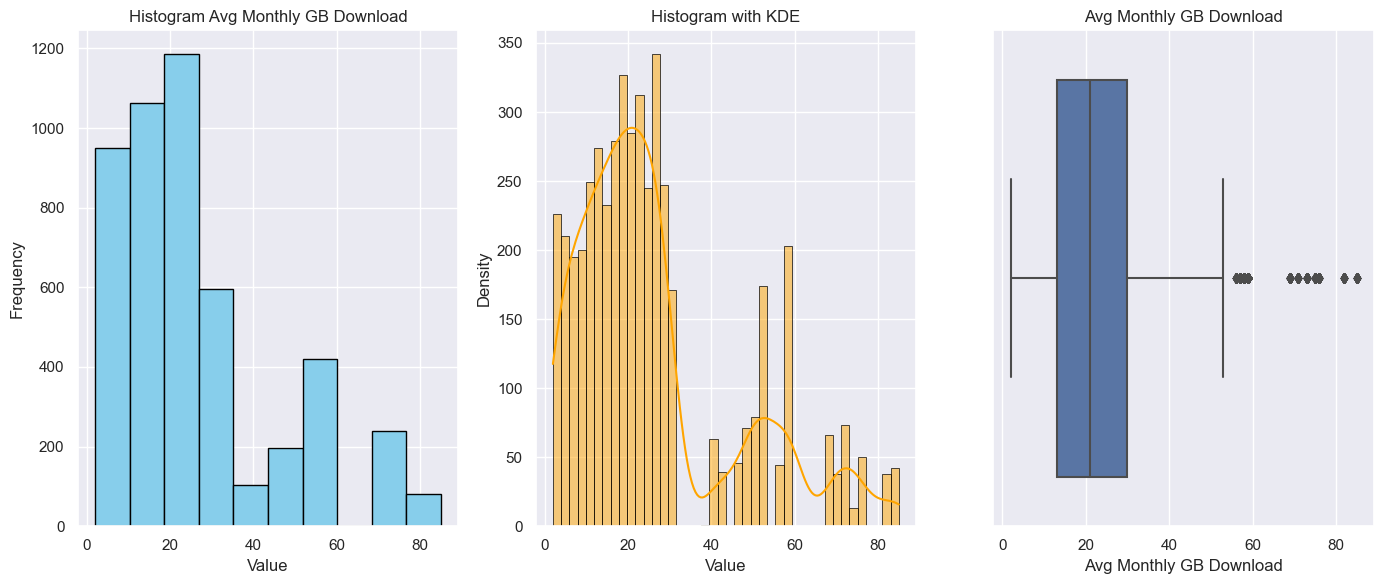

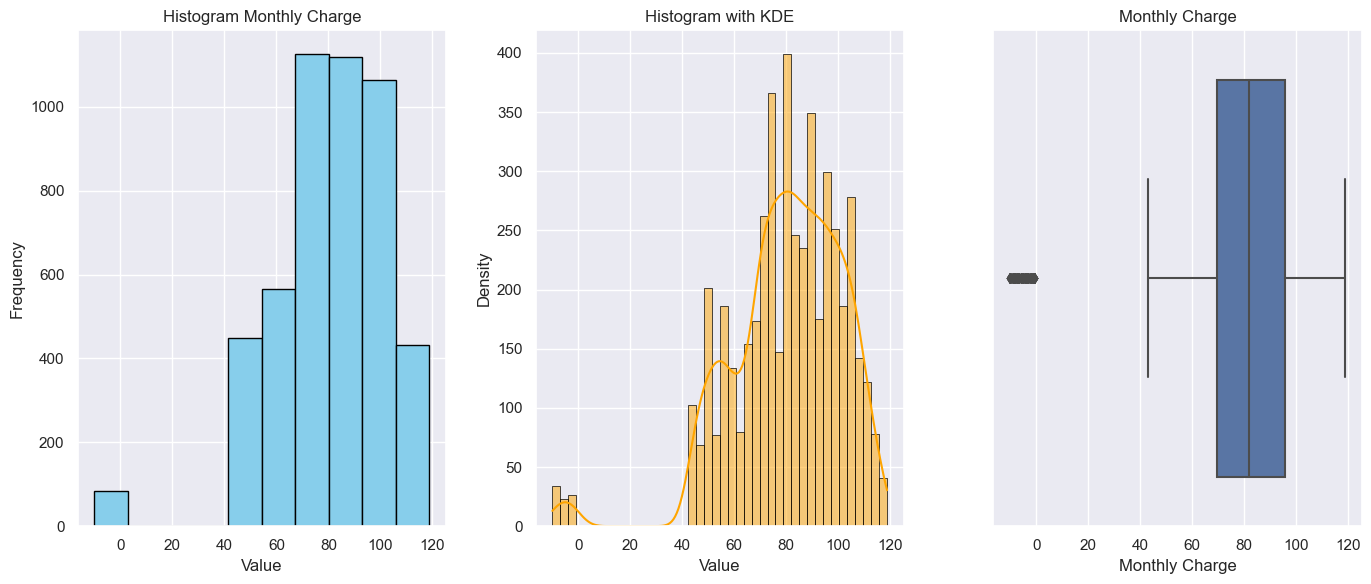

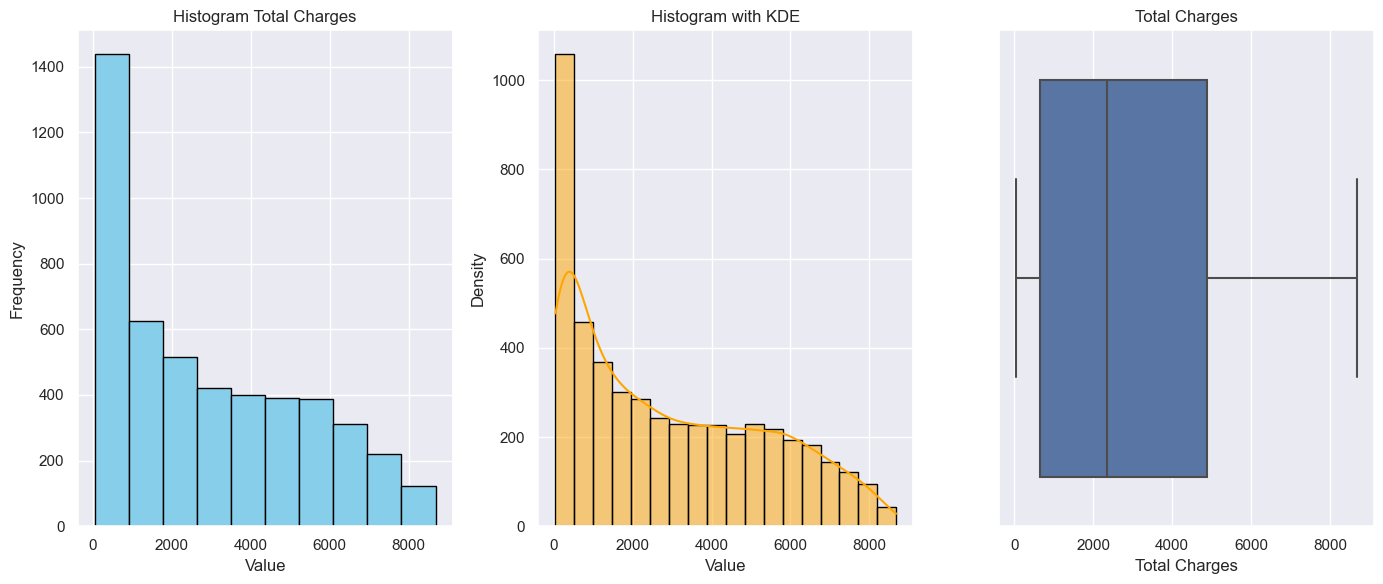

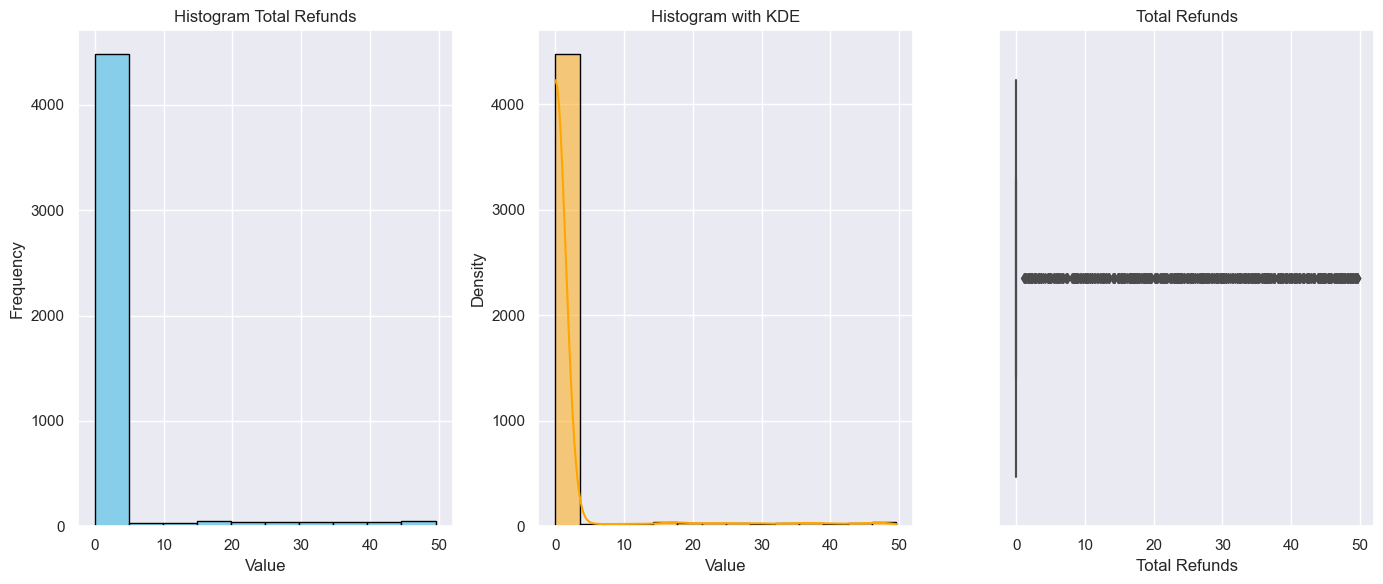

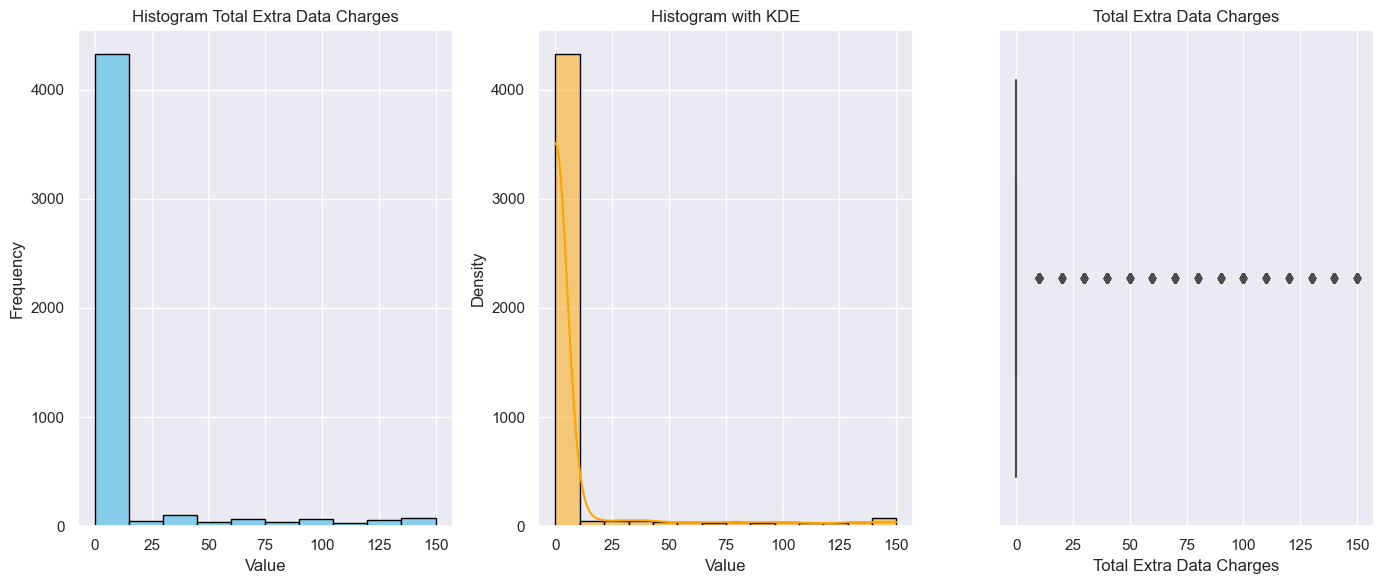

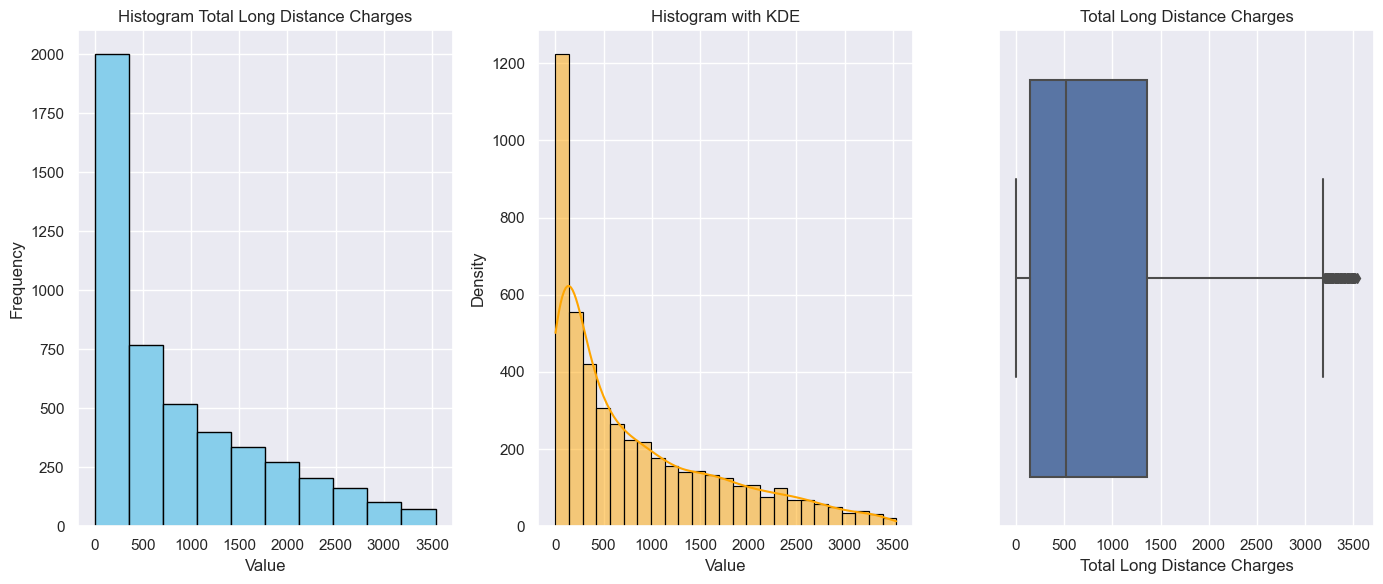

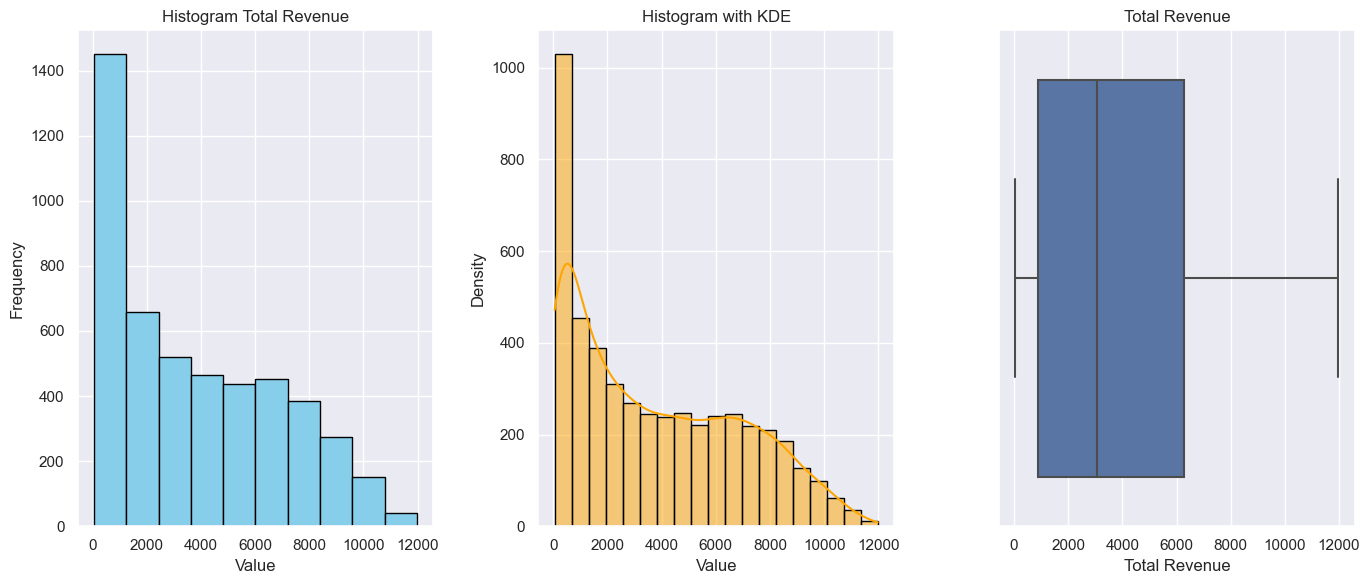

In [20]:
pipeline_num_var = Pipeline([
    ('hist_box_chart', HistBoxChartTransformer())
])

# Fit and transform your data using the pipeline
processed_data = pipeline_num_var.fit_transform(df)

# 8. Numerical - Variables -Outliers Analysis

In [21]:
from scipy import stats

# Define the columns for which you want to remove outliers
selected_columns = ['Number of Dependents', 'Avg Monthly GB Download', 'Total Refunds',
                    'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']

# Calculate the Z-scores for the selected columns in the training data
z_scores = np.abs(stats.zscore(df[selected_columns]))

# Set a threshold value for outlier detection (e.g., 3)
threshold = 3

# Find the indices of outliers based on the threshold
outlier_indices = np.where(z_scores > threshold)[0]

# Remove the outliers from the training data
df = df.drop(df.index[outlier_indices])


# 9. Bi Variate Analysis

## 9.1 cat to target(cat)

In [22]:
target="Customer Status"
cat_vars = df.select_dtypes(include=['object']).columns.tolist()
if target in cat_vars:
    cat_vars.remove(target)
len(cat_vars)

17

Customer Status  Churned  Stayed
Gender                          
Female               752    1441
Male                 723    1477
Customer Status  Churned  Stayed
Married                         
No                   947    1341
Yes                  528    1577
Customer Status  Churned  Stayed
Phone Service                   
Yes                 1475    2918
Customer Status  Churned  Stayed
Multiple Lines                  
No                   717    1335
Yes                  758    1583
Customer Status   Churned  Stayed
Internet Service                 
Yes                  1475    2918
Customer Status  Churned  Stayed
Internet Type                   
Cable                146     409
DSL                  185     897
Fiber Optic         1144    1612
Customer Status  Churned  Stayed
Online Security                 
No                  1228    1596
Yes                  247    1322
Customer Status  Churned  Stayed
Online Backup                   
No                  1043    1434
Yes    

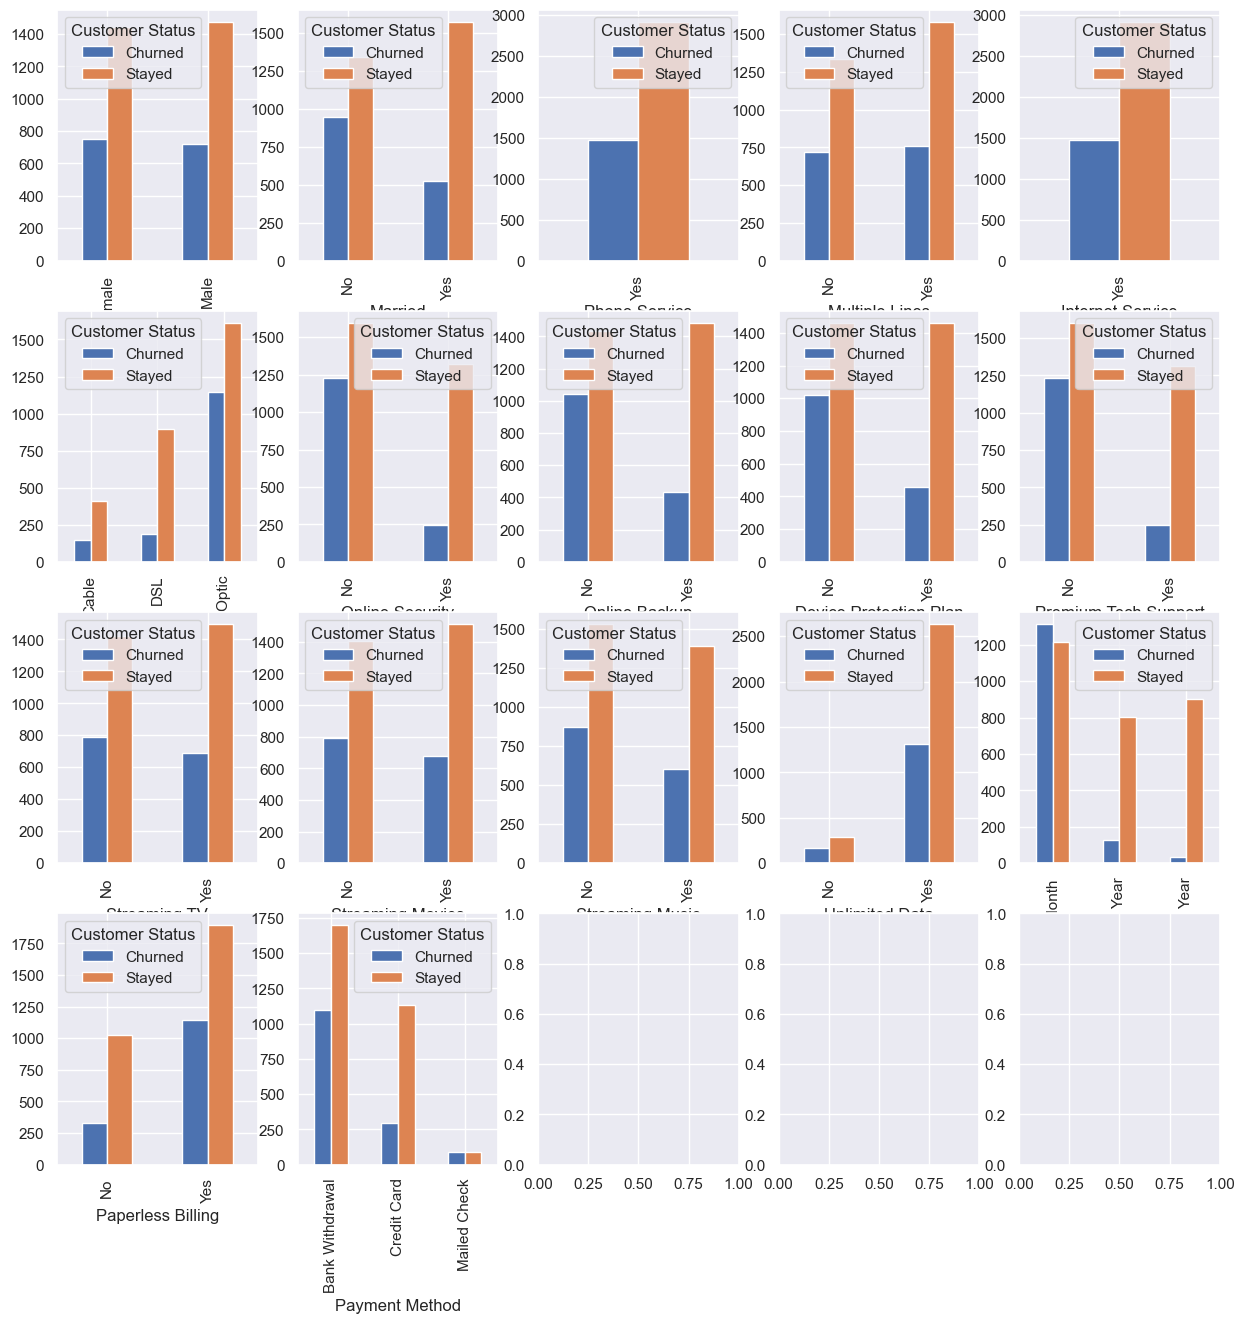

In [23]:
fig,ax = plt.subplots(4,5,figsize=(15,15))
for axi,x in zip(ax.flat,cat_vars):
    col1=df[x]
    col2=df[target]
    result=pd.crosstab(col1,col2)
    print(result)
    print("============================================")
    result.plot(kind='bar',ax=axi)

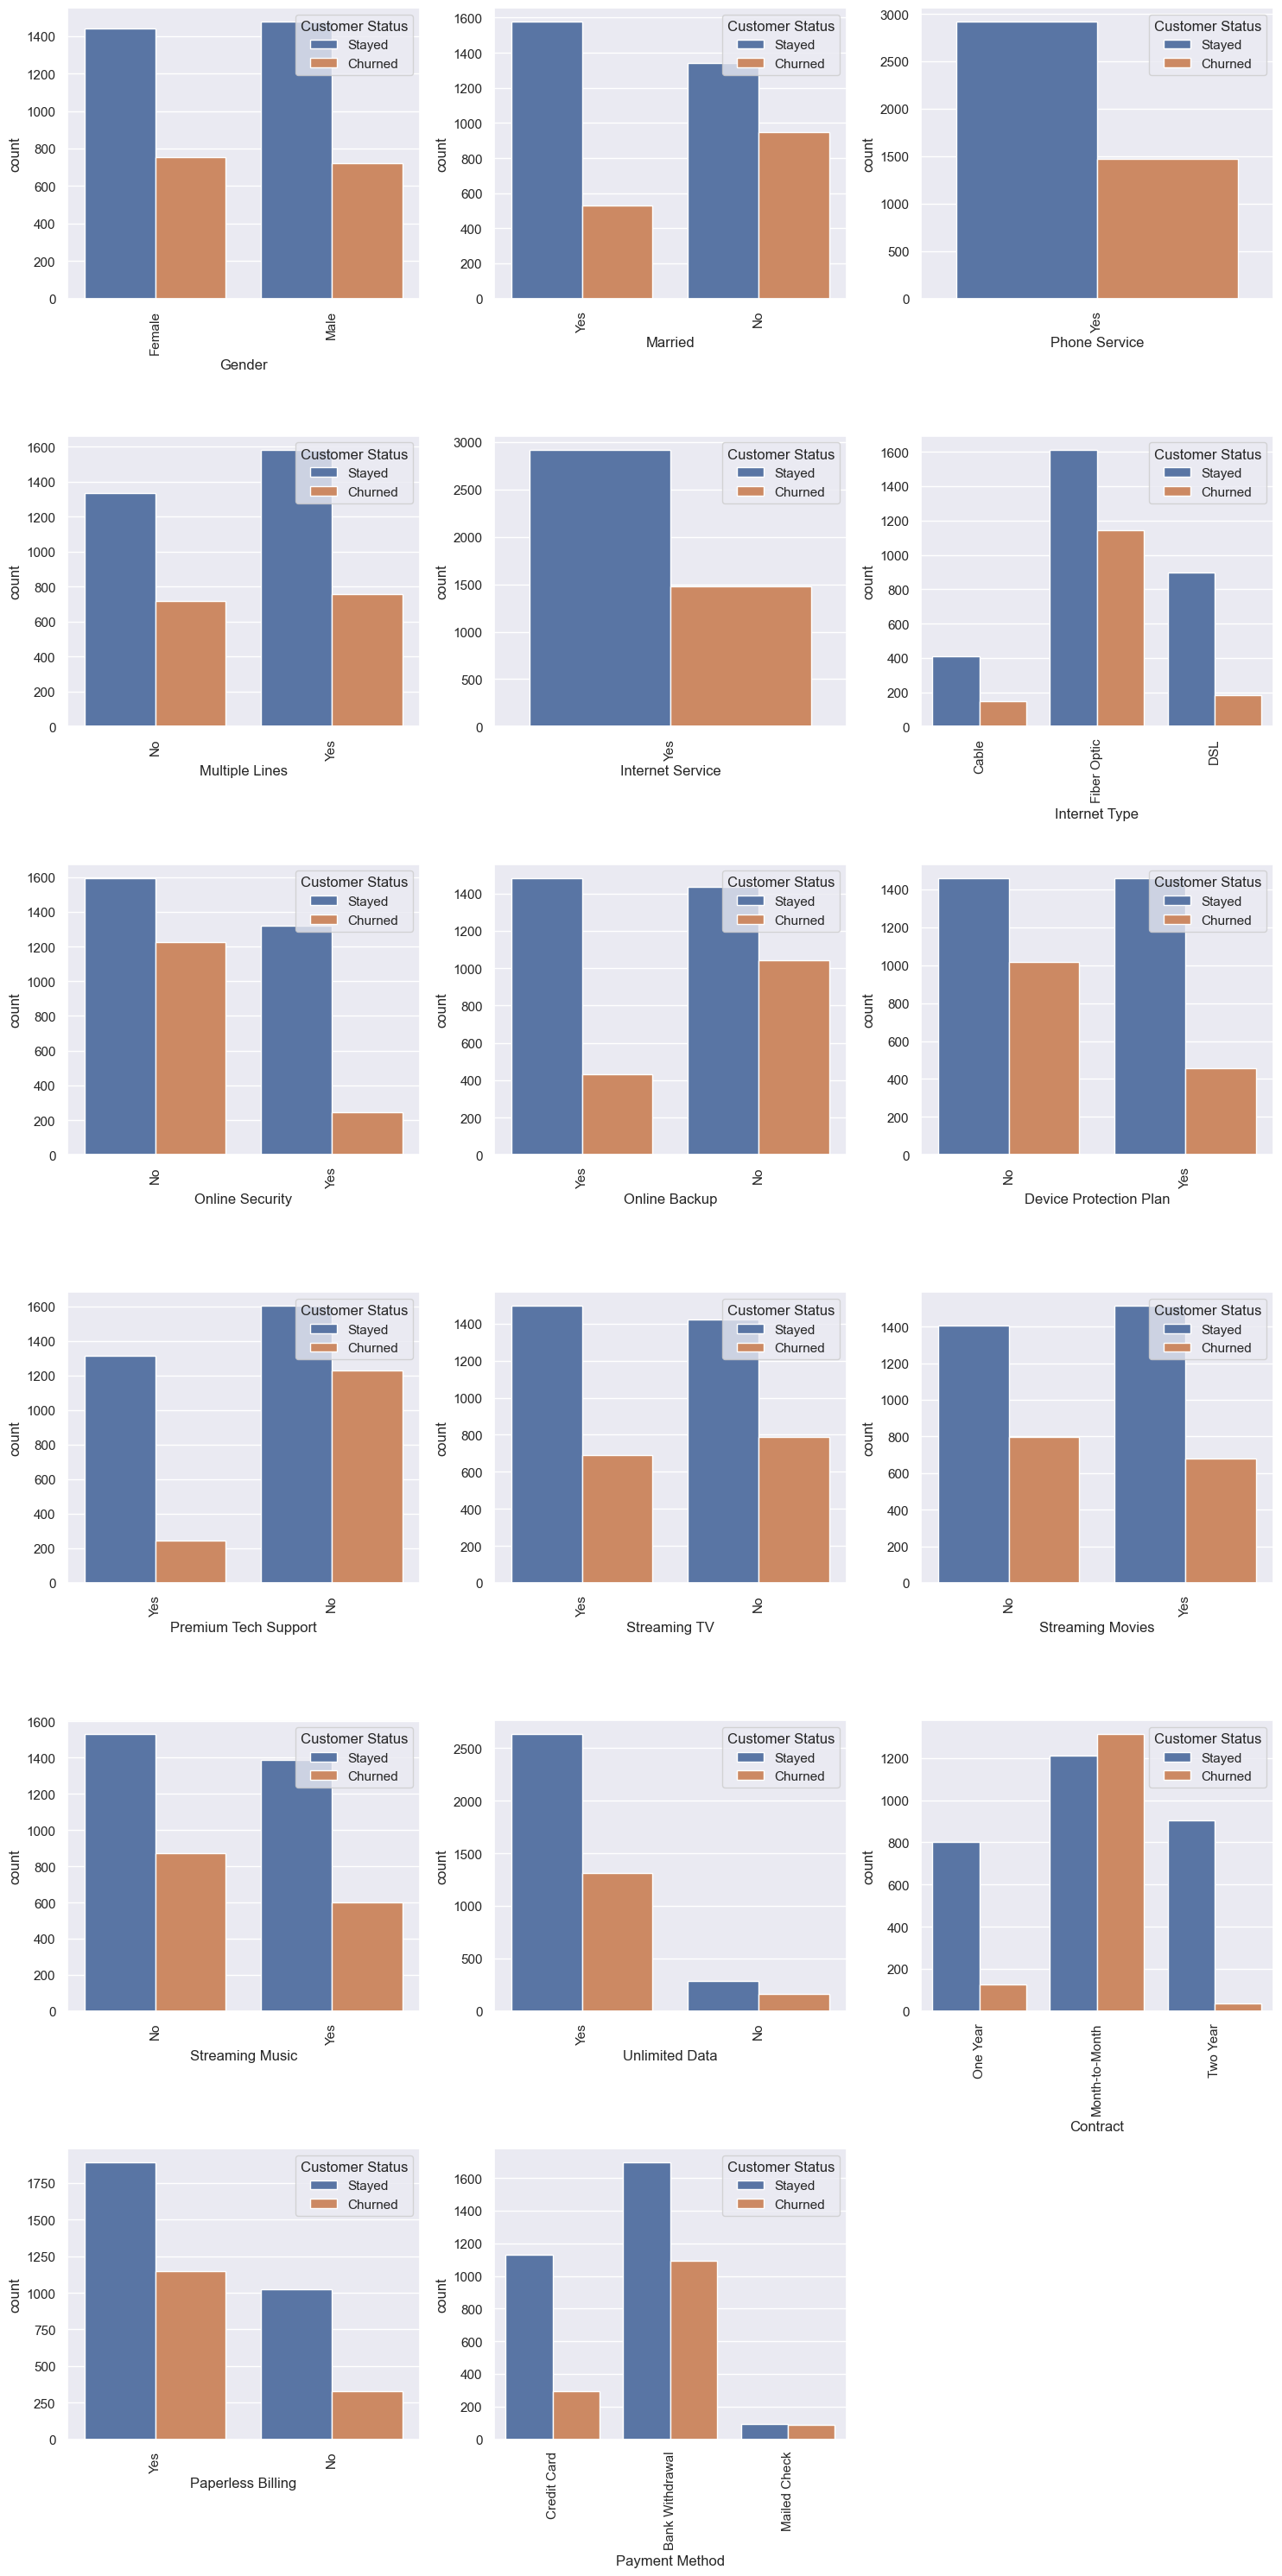

In [24]:
# Create a figure with subplots, but only include the required number of subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a count plot for the top 6 values of each categorical variable
for i, var in enumerate(cat_vars):
    top_values = df[var].value_counts().nlargest(6).index
    filtered_df = df[df[var].isin(top_values)]
    sns.countplot(x=var, hue=target, data=filtered_df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# Remove any remaining blank subplots
for i in range(num_cols, len(axs)):
    fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

## 9.2 Num to target(cat)

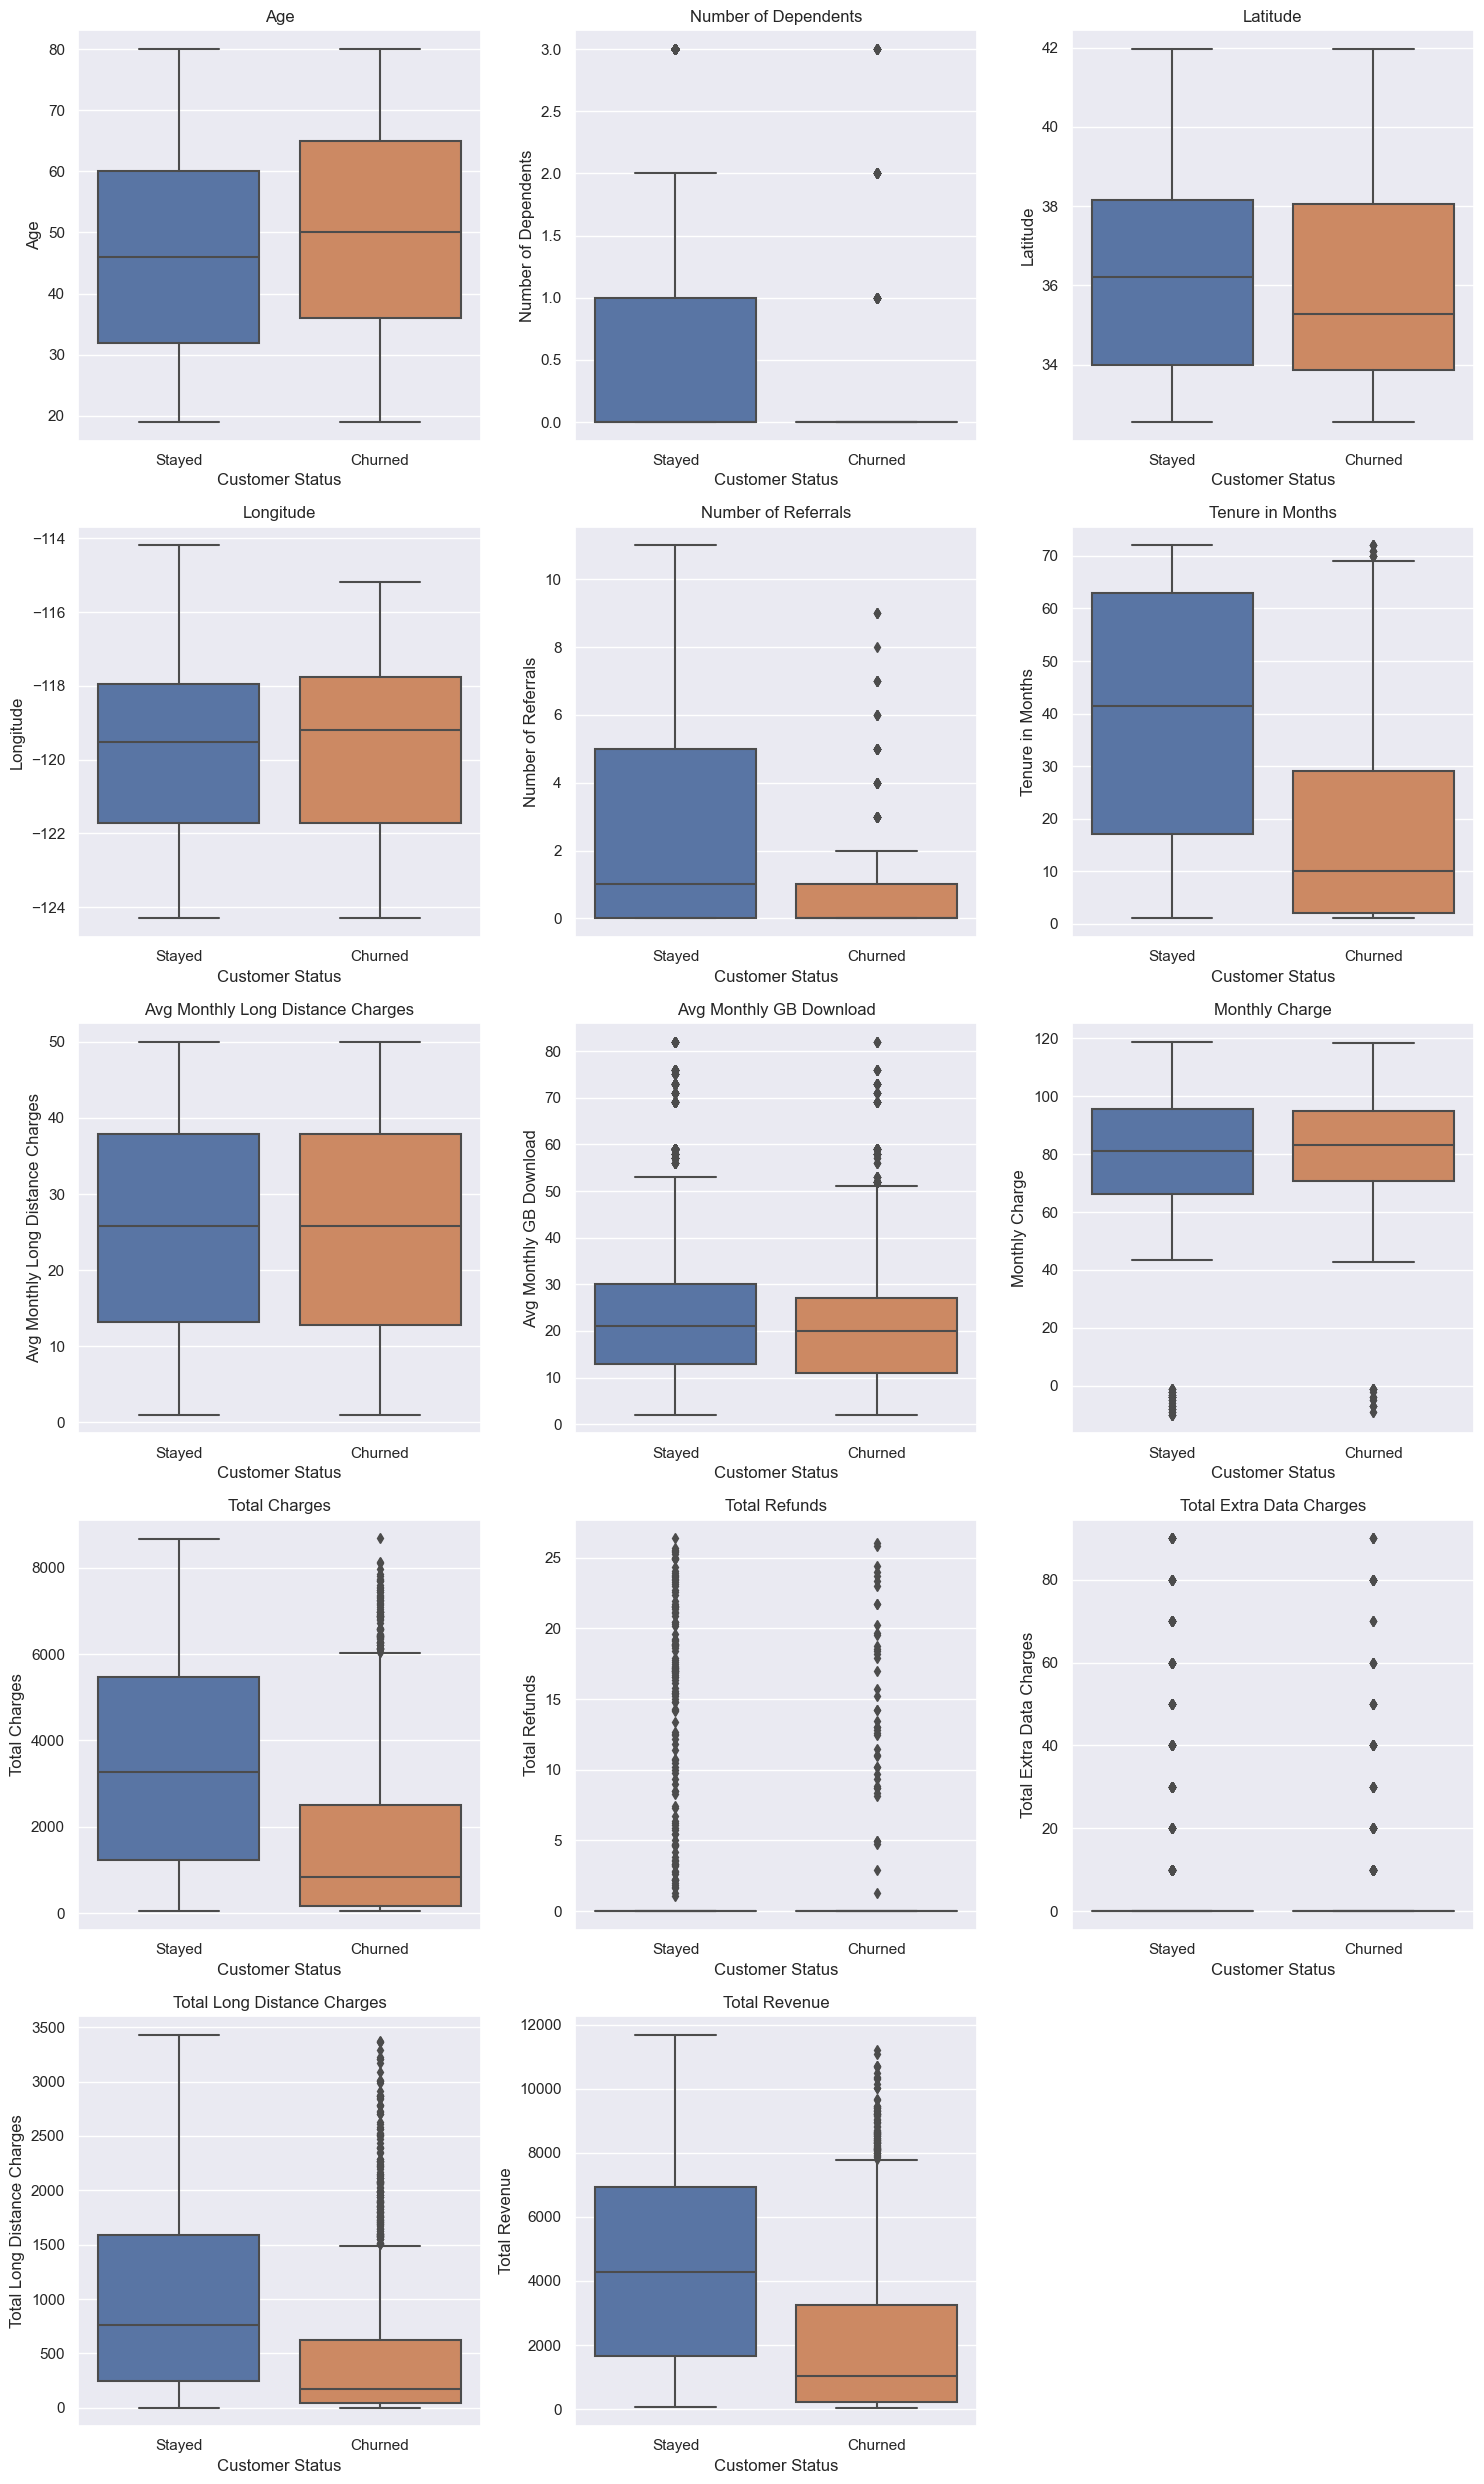

In [25]:
# Get the names of all columns with data type 'int'
target="Customer Status"
num_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(num_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a box plot for each integer variable using Seaborn with hue='attrition'
for i, var in enumerate(num_vars):
    sns.boxplot(y=var, x=target, data=df, ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

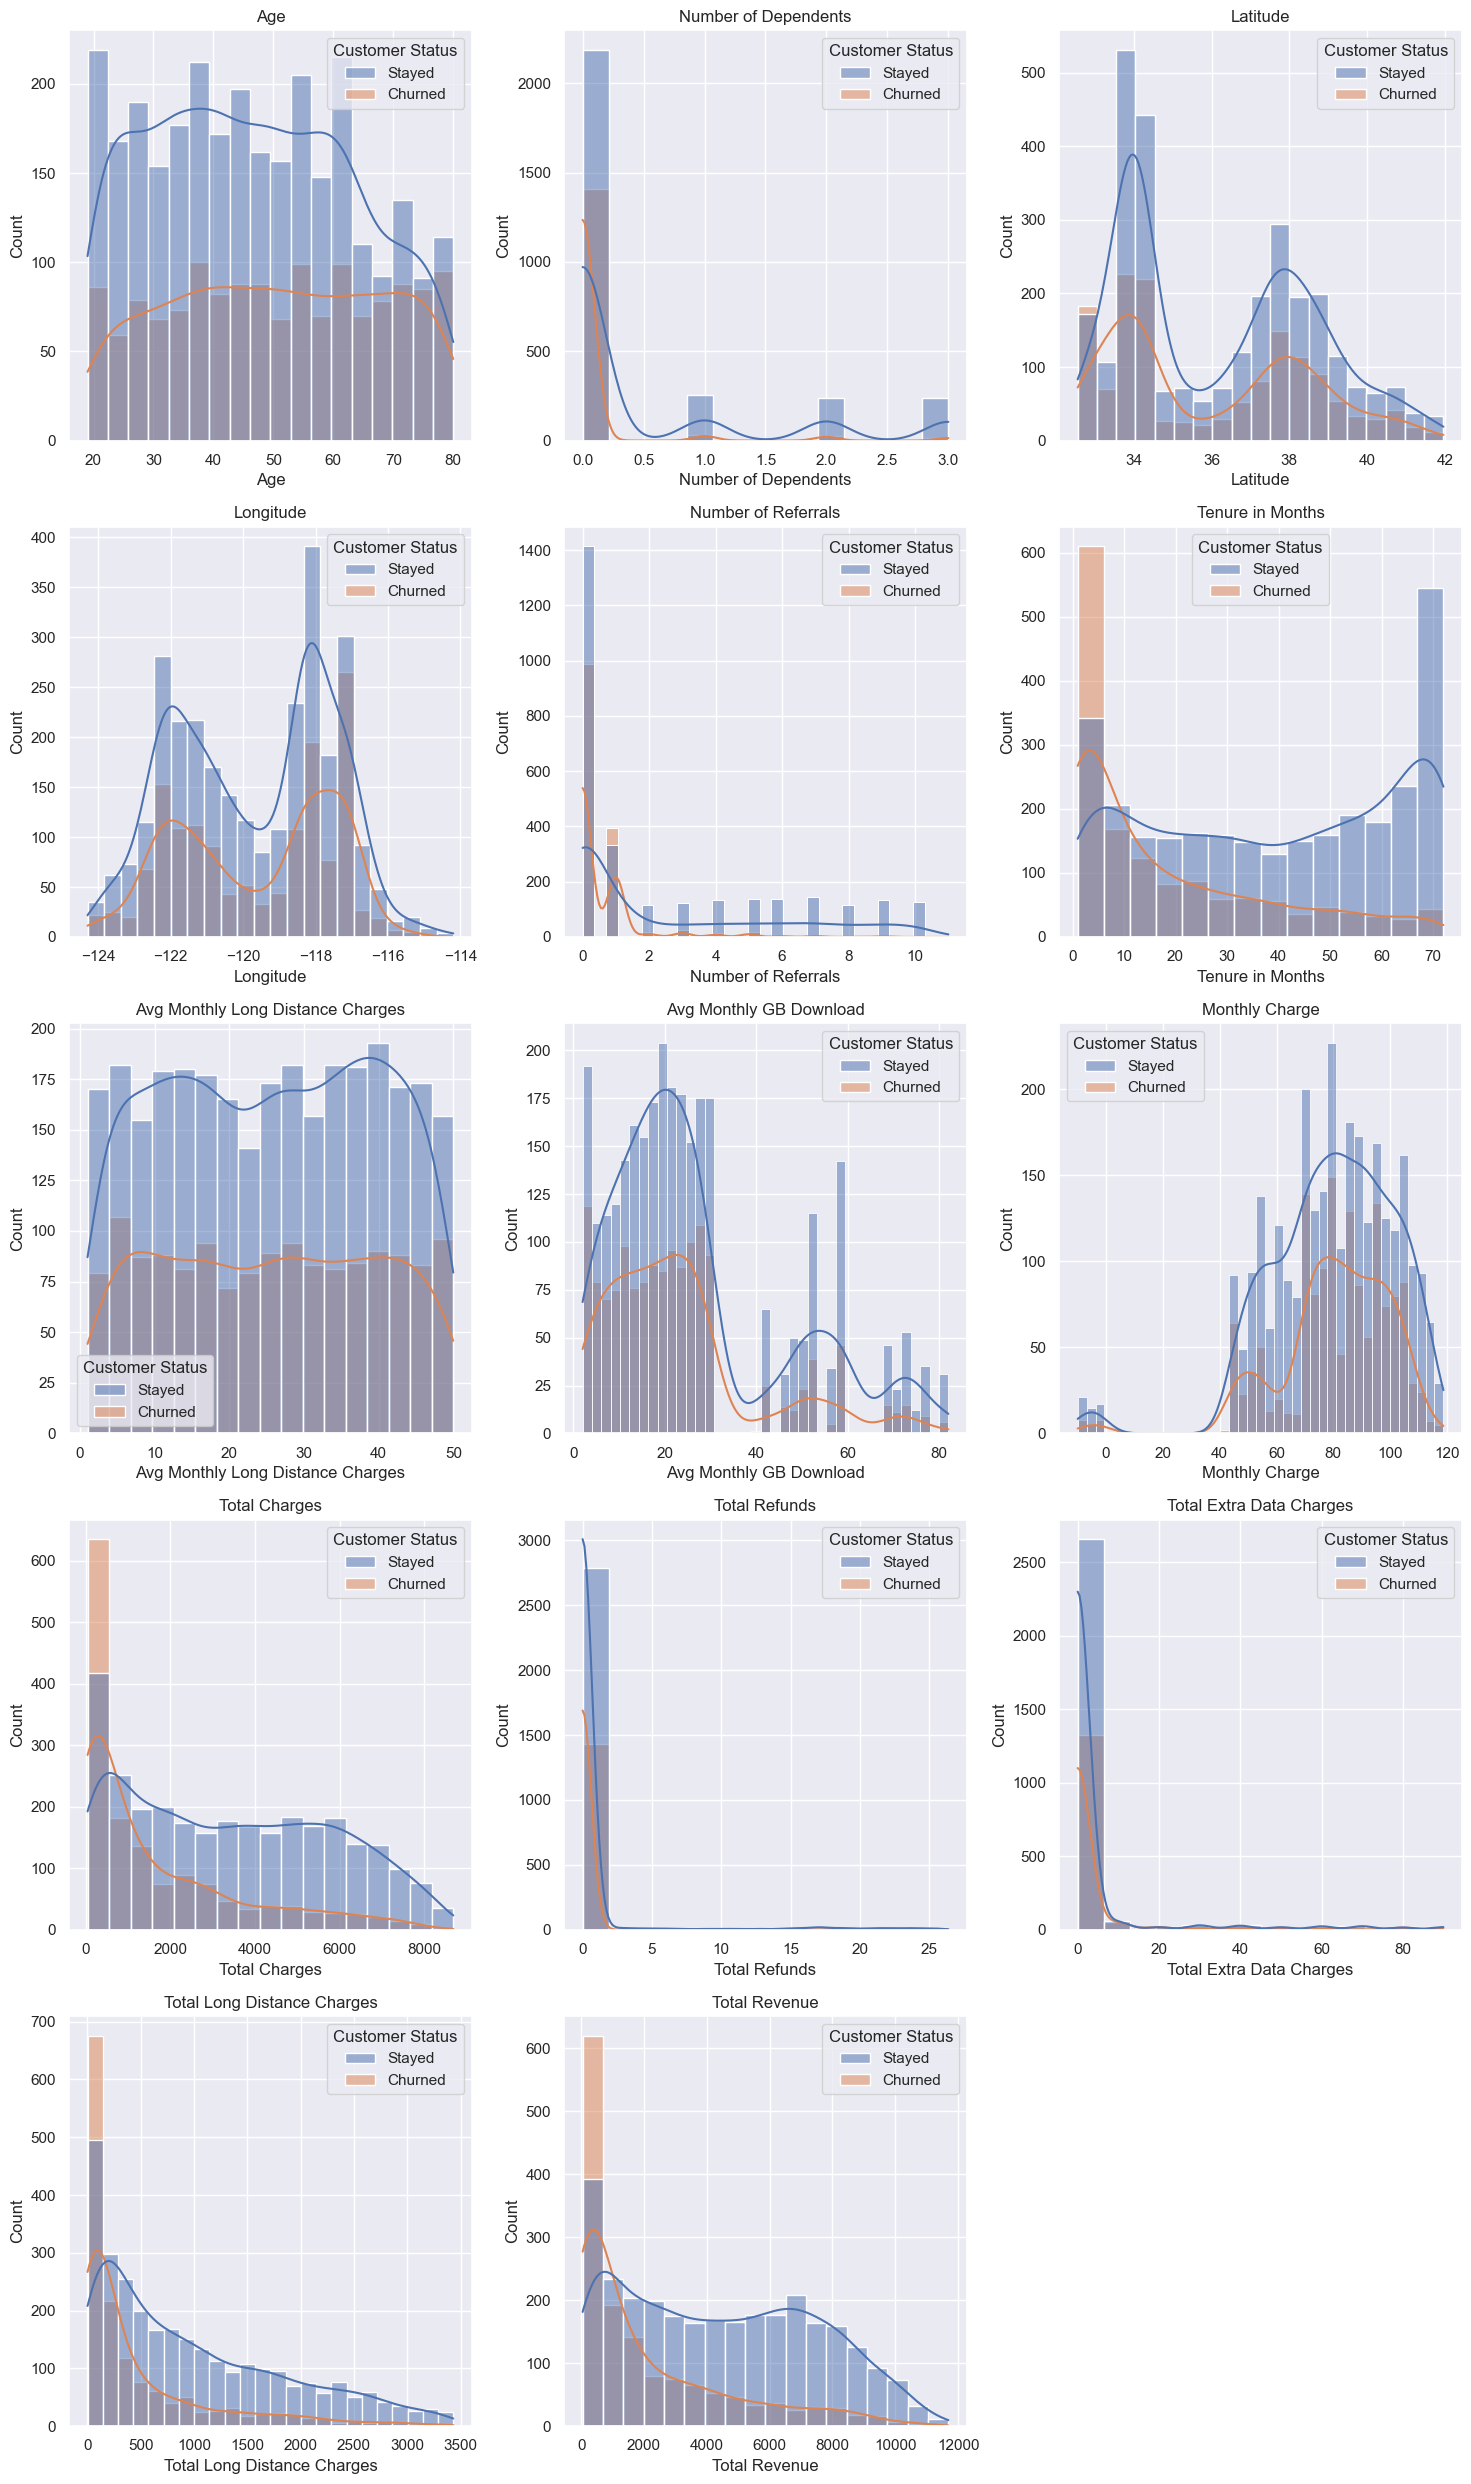

In [26]:
# Get the names of all columns with data type 'int'
num_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(num_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a histogram for each integer variable with hue='Attrition'
for i, var in enumerate(num_vars):
    sns.histplot(data=df, x=var, 
                 hue=target, kde=True, ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

## 9.3 Num to Num

<Axes: >

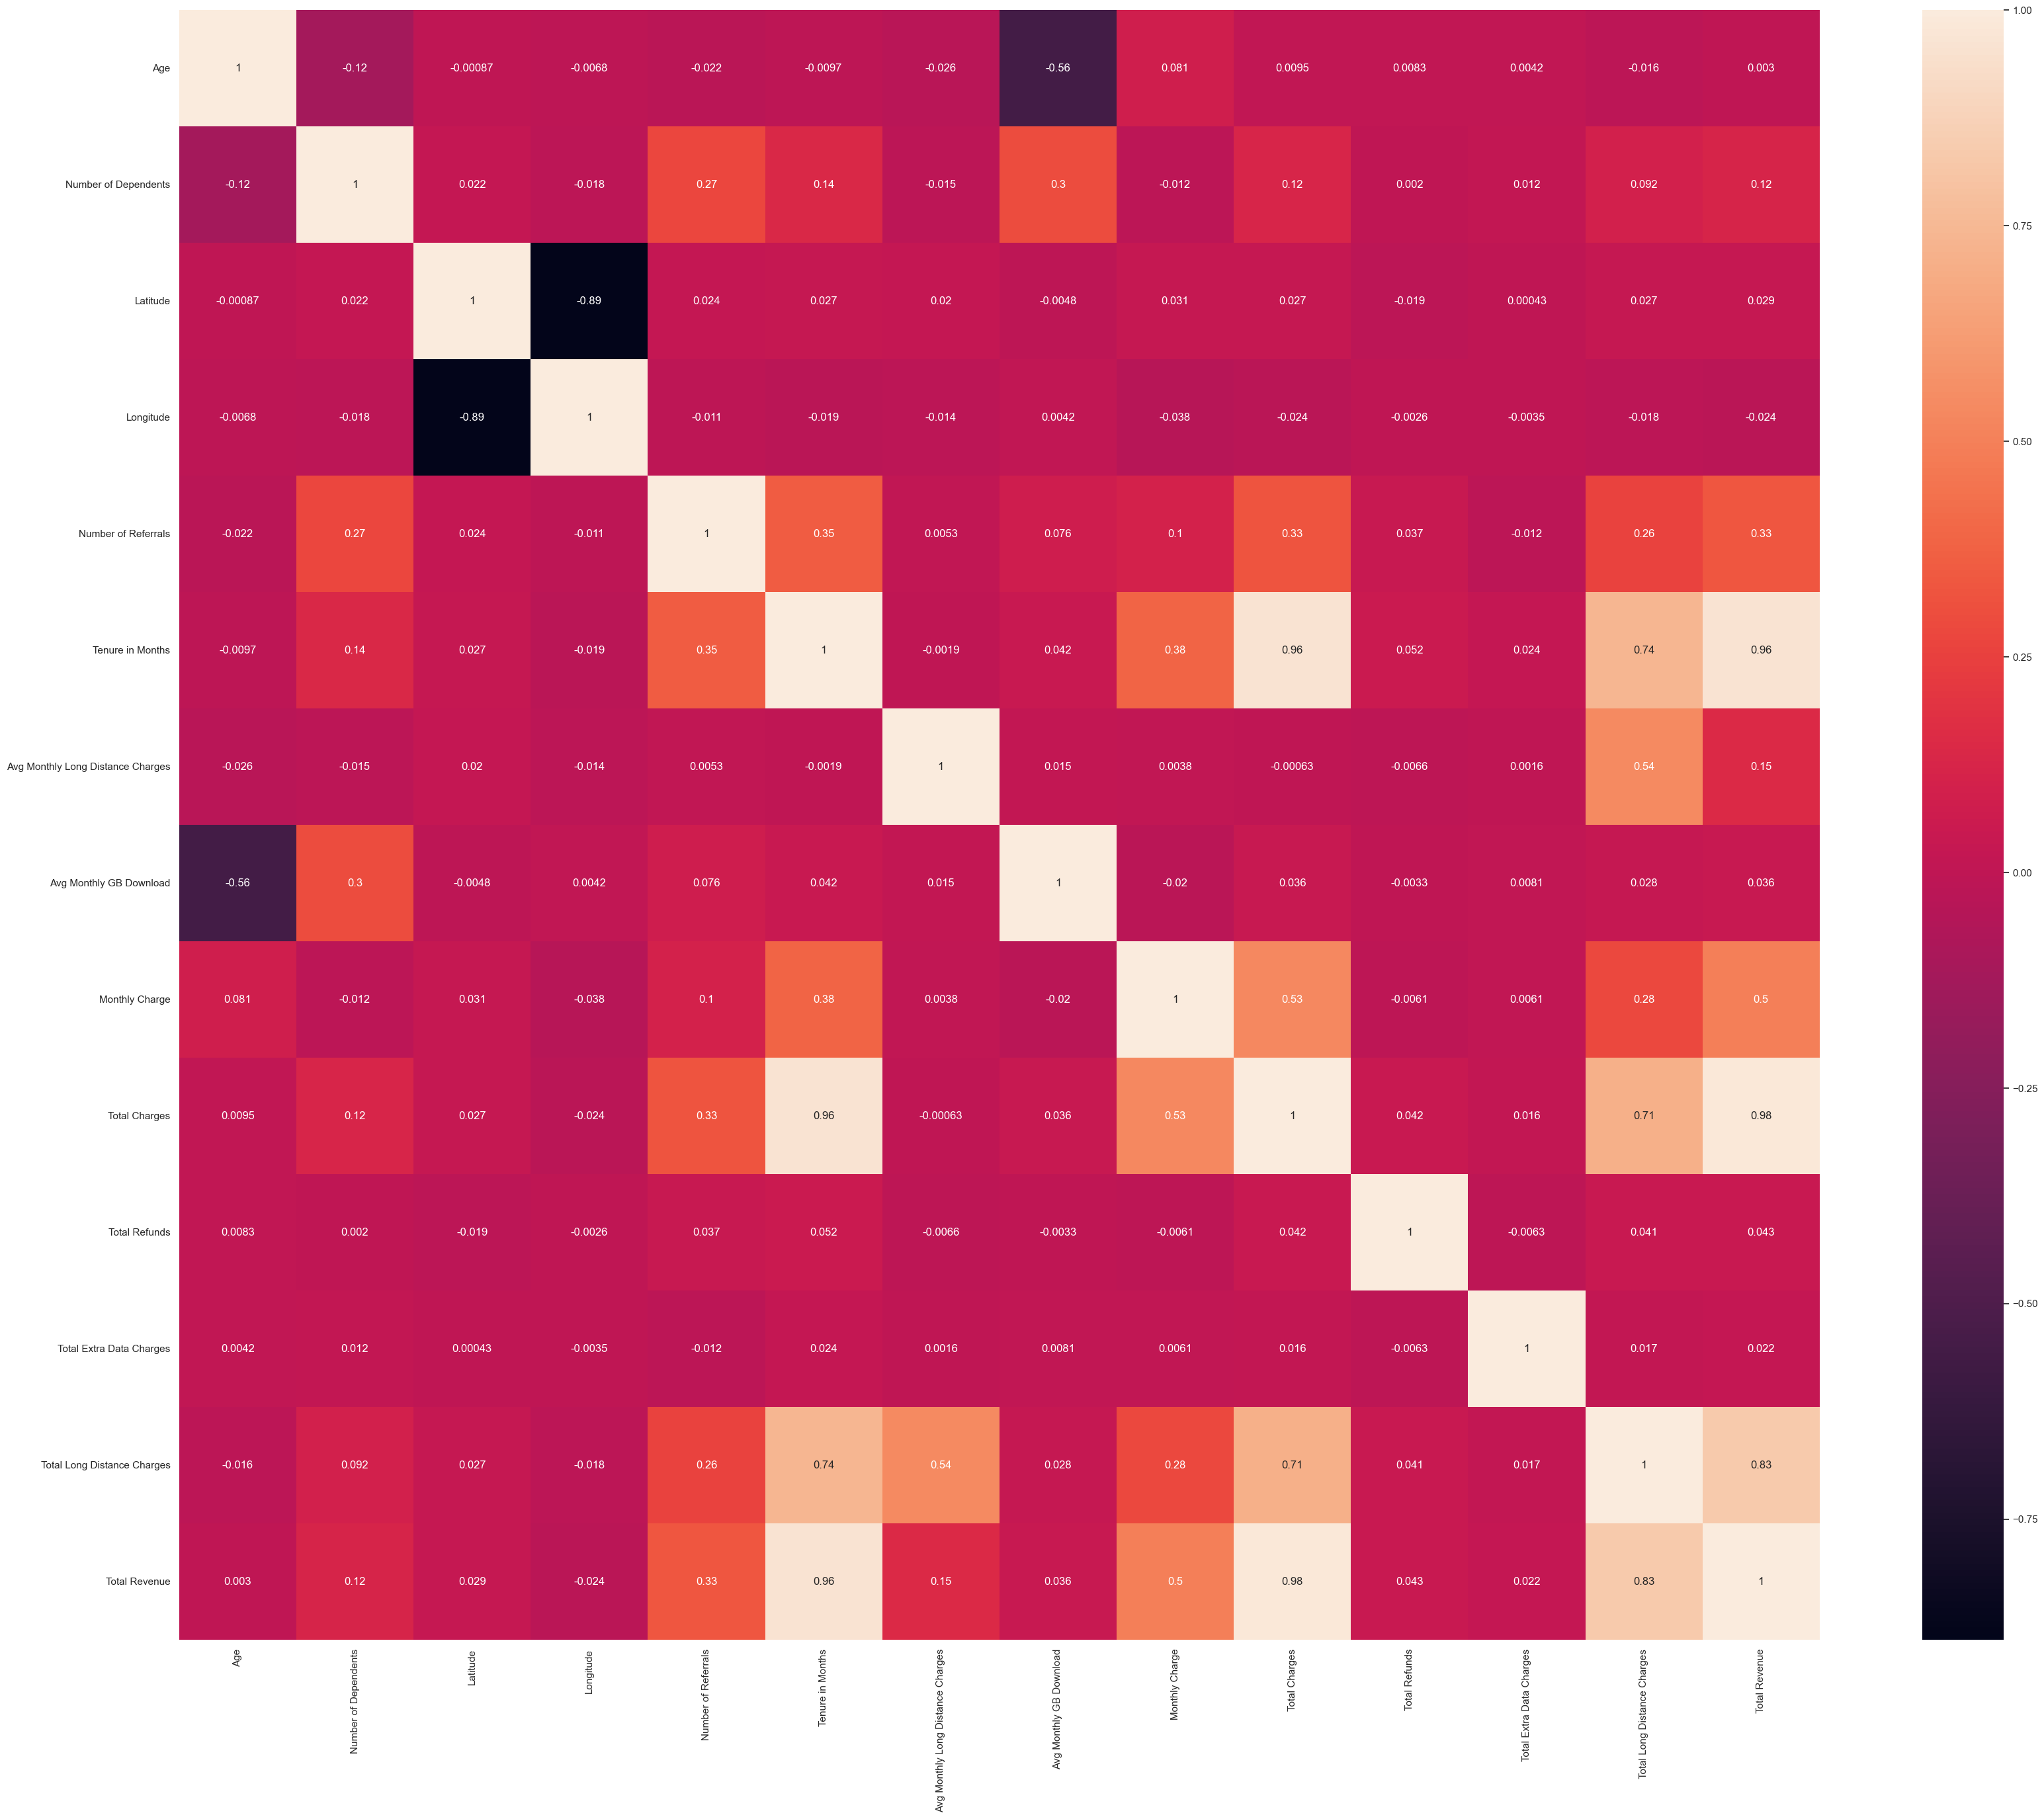

In [27]:
# Correlation Heatmap
plt.figure(figsize=(40, 32))
sns.heatmap(df.corr(numeric_only=True), fmt='.2g', annot=True)

# 12. Convert Cat - to - Numerical Columns

In [28]:
# Loop over each column in the DataFrame where dtype is 'object'
for cat_col in df.select_dtypes(include=['object']).columns:

    # Print the column name and the unique values
    print(f"{cat_col}: {df[cat_col].unique()}")

Gender: ['Female' 'Male']
Married: ['Yes' 'No']
Phone Service: ['Yes']
Multiple Lines: ['No' 'Yes']
Internet Service: ['Yes']
Internet Type: ['Cable' 'Fiber Optic' 'DSL']
Online Security: ['No' 'Yes']
Online Backup: ['Yes' 'No']
Device Protection Plan: ['No' 'Yes']
Premium Tech Support: ['Yes' 'No']
Streaming TV: ['Yes' 'No']
Streaming Movies: ['No' 'Yes']
Streaming Music: ['No' 'Yes']
Unlimited Data: ['Yes' 'No']
Contract: ['One Year' 'Month-to-Month' 'Two Year']
Paperless Billing: ['Yes' 'No']
Payment Method: ['Credit Card' 'Bank Withdrawal' 'Mailed Check']
Customer Status: ['Stayed' 'Churned']


In [29]:
le = LabelEncoder()
   
# Loop over each column in the DataFrame where dtype is 'object'
for cat_col in df.select_dtypes(include=['object']).columns:
    df[cat_col]=le.fit_transform(df[cat_col])
    # Print the column name and the unique values
    print(f"{cat_col}: {df[cat_col].unique()}")

Gender: [0 1]
Married: [1 0]
Phone Service: [0]
Multiple Lines: [0 1]
Internet Service: [0]
Internet Type: [0 2 1]
Online Security: [0 1]
Online Backup: [1 0]
Device Protection Plan: [0 1]
Premium Tech Support: [1 0]
Streaming TV: [1 0]
Streaming Movies: [0 1]
Streaming Music: [0 1]
Unlimited Data: [1 0]
Contract: [1 0 2]
Paperless Billing: [1 0]
Payment Method: [1 0 2]
Customer Status: [1 0]


<Axes: >

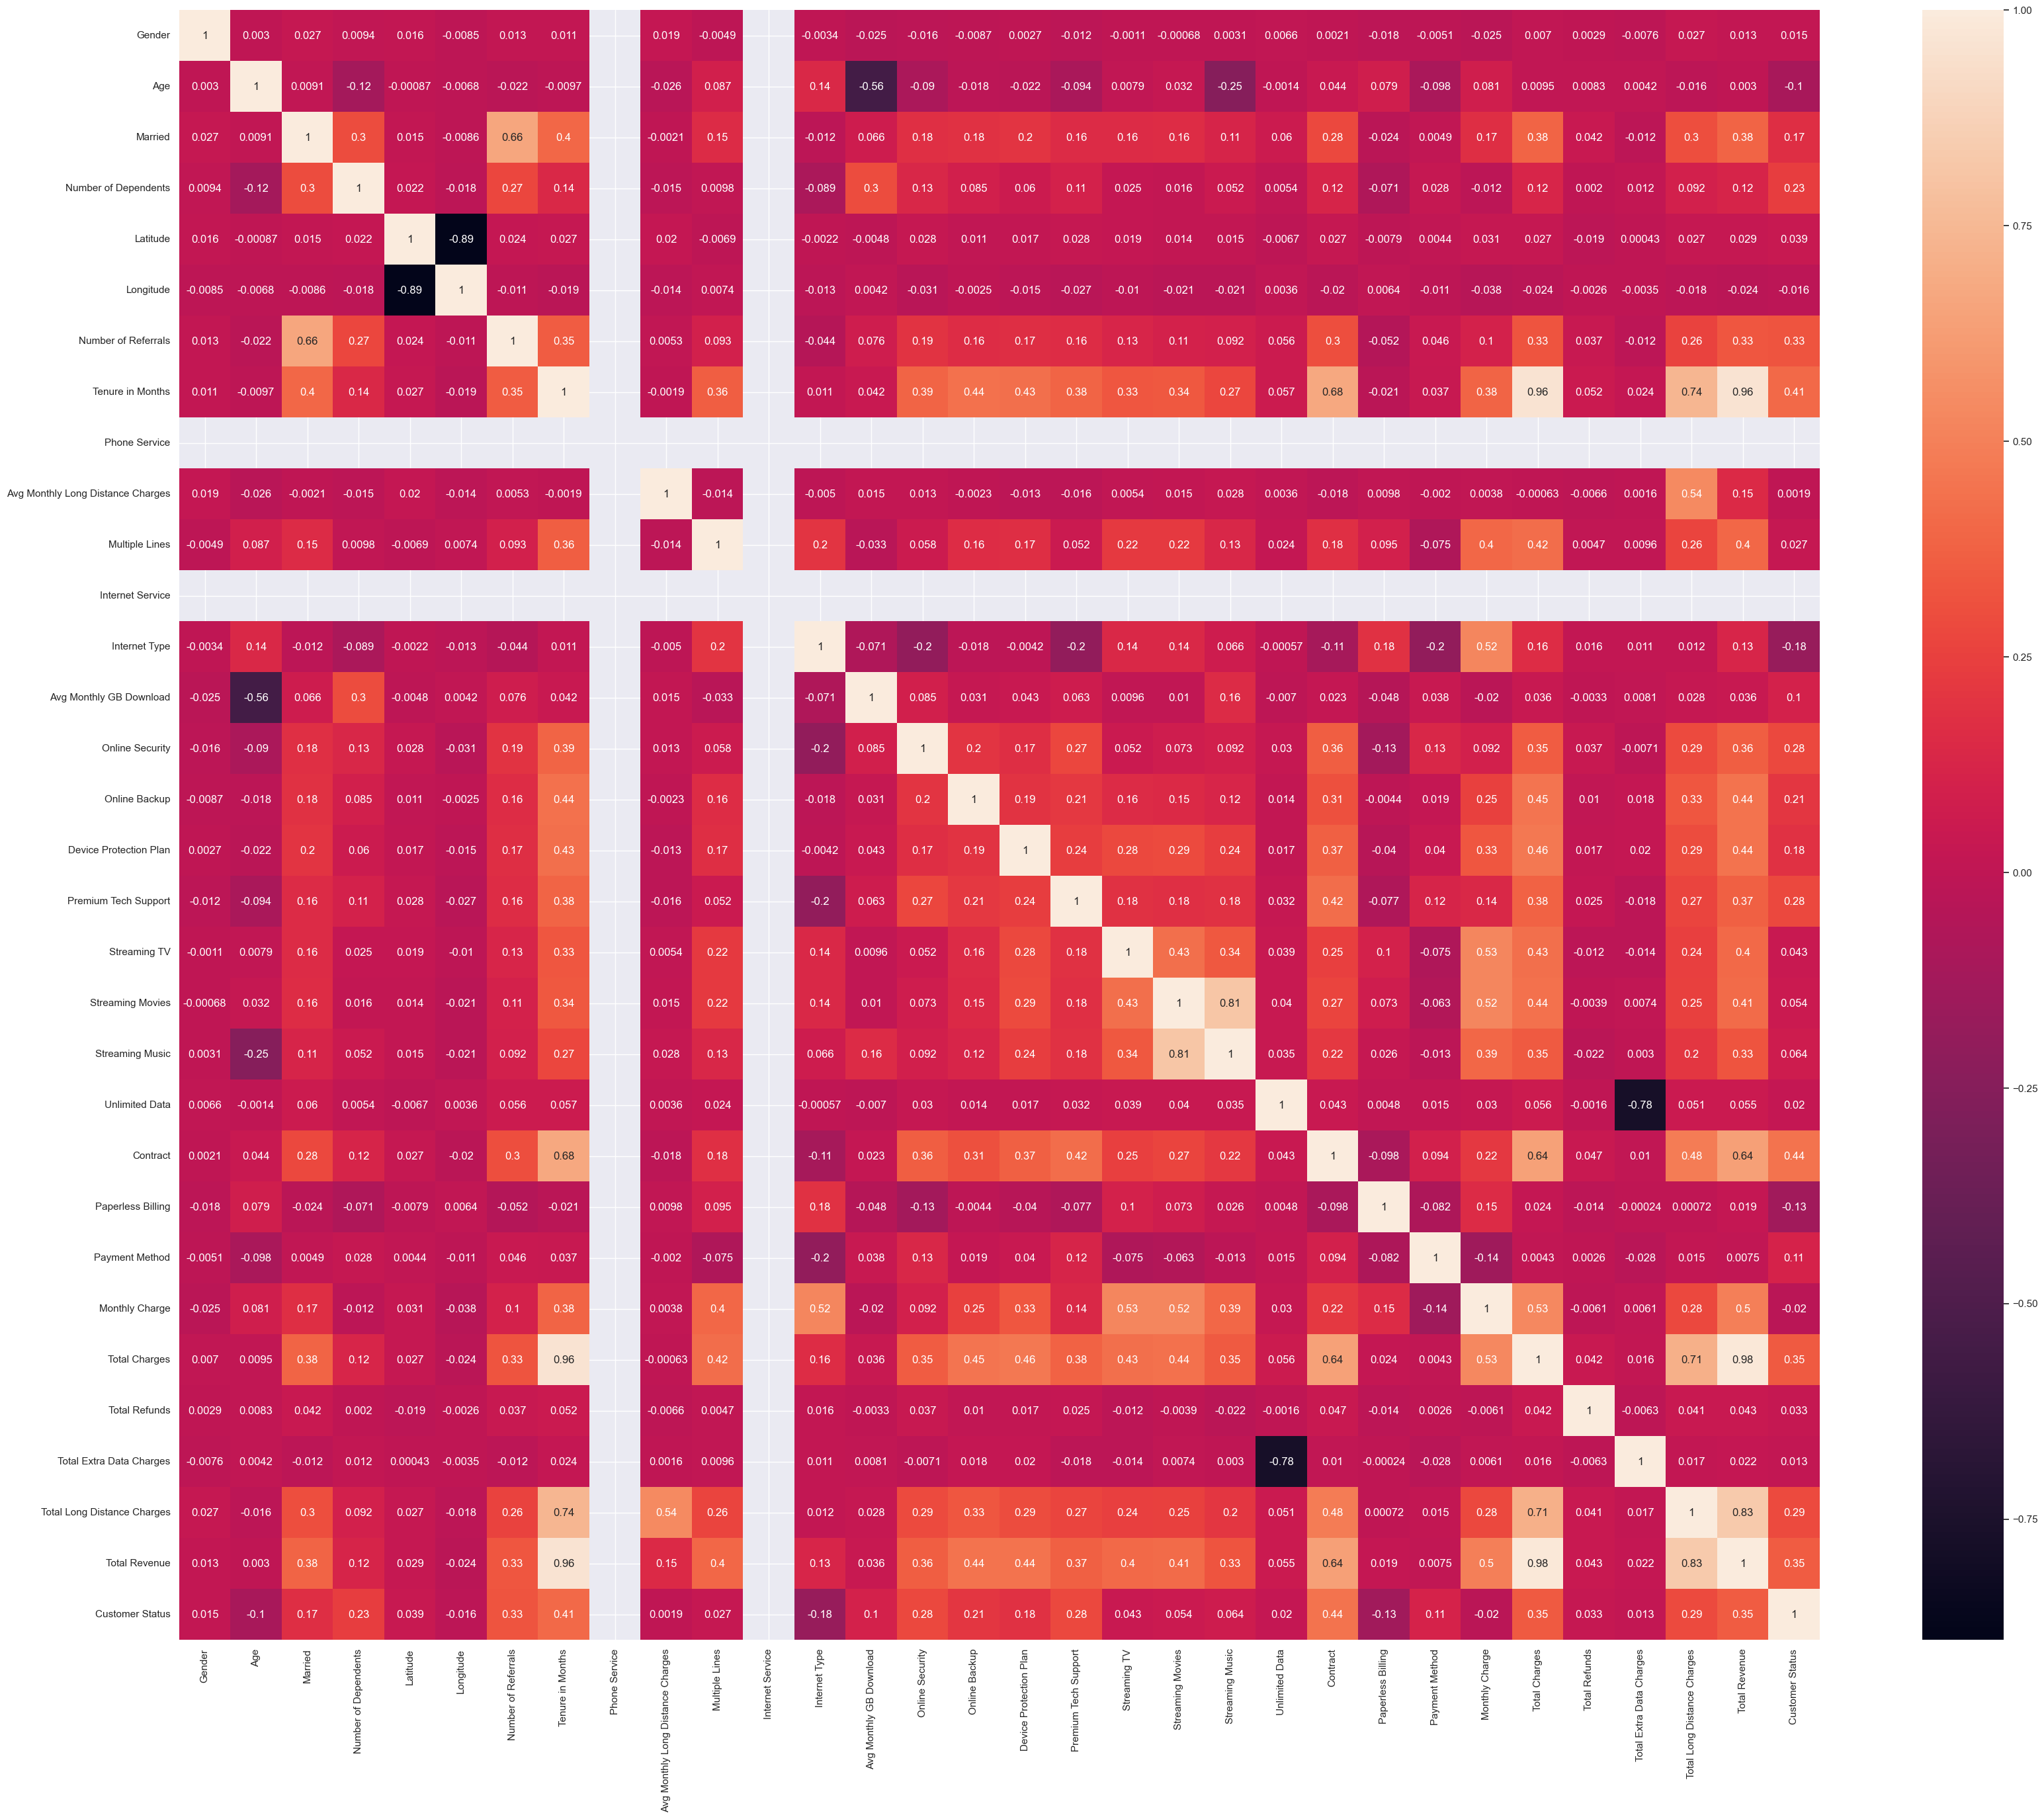

In [30]:
# Correlation Heatmap
plt.figure(figsize=(40, 32))
sns.heatmap(df.corr(numeric_only=True), fmt='.2g', annot=True)

In [31]:
# Remove Internet Service and Phone Service column because of zero correlation
df.drop(columns = ['Internet Service', 'Phone Service'], inplace=True)
df.shape

(4393, 30)

# 13. EDA- Final

In [32]:
df.to_csv("telecom-churn-preprocessed_data.csv",index=False)